Shrunken hg19 regions by 1000




So let's align all of the reads (UNPAIRED TO MATCH 1KG) from each subject in gEUVADIS to a collection of viral references. Some subjects had multiple sets of reads. And the coverage depth was extracted from this alignment file for each virus. In addition, the number of reads that aligned in the EXPANDED nonhg19 regions were counted and the ratio of this number and the total number of sequenced reads for subject. These last 2 numbers are plotted below, grouped by the subject's super population.


```
samtools fasta -N $subjects_unmapped_bam

bowtie2 --all --threads 35 -f --xeq -x virii --very-sensitive -U ${subject}/${subject}.fasta.gz

samtools depth ${subject}/${subject}.virii.bam > ${subject}/${subject}.virii.depth.csv

samtools view -c -F 4 ${subject}/${subject}.virii.bam ${region} > ${f}

```


Minimal difference to the comparison to regions shrunk by 1000 bp.


In [1]:
import pandas
import sqlite3
import matplotlib.pyplot as plt

In [2]:
# For some reason, if this is in the same call as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [3]:
virii=pandas.read_csv('/Users/jakewendt/20181214-1000genomes-unmapped-virii/virii_details.csv', sep="\t", header=None, 
                      names=["accession","description"],
                      index_col=["accession"])
virii.head()

,description
accession,
AB513134.1,"Human T-lymphotropic virus 1 proviral DNA, com..."
AB618031.1,"Herpes simplex virus (type 1 /strain RH2) DNA,..."
AF037218.1,"Human herpesvirus 7 strain RK, complete genome"
AF148805.2,"Human herpesvirus 8 strain GK18, complete genome"
AP015015.1,"Human herpesvirus 4 DNA, complete genome, stra..."


In [4]:
len(virii)

122

In [5]:
metadata=pandas.read_csv("1000genomes_metadata.csv")
metadata.rename(index=str, columns={"Sample":"subject"},inplace=True)
metadata.head()

,subject,Population Code,Population Description,Gender,Super Population Code,Super Population Description
0,HG00096,GBR,British in England and Scotland,male,EUR,European
1,HG00097,GBR,British in England and Scotland,female,EUR,European
2,HG00098,GBR,British in England and Scotland,male,EUR,European
3,HG00099,GBR,British in England and Scotland,female,EUR,European
4,HG00100,GBR,British in England and Scotland,female,EUR,European


In [6]:
conn = sqlite3.connect("/Users/jakewendt/20190130-gEUVADIS-viruses/viral_mapped.sqlite3")
df = pandas.read_sql_query("SELECT * FROM subjects ORDER BY subject", conn)
df.head()

,subject,total,AB513134_1,AB513134_1_total,nonhg19_AB513134_1,nonhg19_AB513134_1_total,AB618031_1,AB618031_1_total,nonhg19_AB618031_1,nonhg19_AB618031_1_total,...,nonhg19_X75658_1,nonhg19_X75658_1_total,X83413_2,X83413_2_total,nonhg19_X83413_2,nonhg19_X83413_2_total,Z86099_2,Z86099_2_total,nonhg19_Z86099_2,nonhg19_Z86099_2_total
0,HG00096,54512330,0,0.0,0,0.0,47,8.621903e-07,5,9.172237e-08,...,0,0.0,12,2.201337e-07,0,0.000000e+00,30,5.503342e-07,0,0.000000e+00
1,HG00097,87882216,0,0.0,0,0.0,119,1.354085e-06,0,0.000000e+00,...,0,0.0,2,2.275773e-08,0,0.000000e+00,40,4.551547e-07,0,0.000000e+00
2,HG00099,121655616,0,0.0,0,0.0,72,5.918346e-07,3,2.465977e-08,...,0,0.0,45,3.698966e-07,4,3.287970e-08,8,6.575940e-08,8,6.575940e-08
3,HG00100,44683676,0,0.0,0,0.0,15,3.356931e-07,0,0.000000e+00,...,0,0.0,106,2.372231e-06,0,0.000000e+00,0,0.000000e+00,0,0.000000e+00
4,HG00101,46516462,0,0.0,0,0.0,24,5.159464e-07,0,0.000000e+00,...,0,0.0,20,4.299553e-07,0,0.000000e+00,65,1.397355e-06,22,4.729508e-07


In [7]:
len(df)

464

In [8]:
df = df.merge(metadata)
df.head()

,subject,total,AB513134_1,AB513134_1_total,nonhg19_AB513134_1,nonhg19_AB513134_1_total,AB618031_1,AB618031_1_total,nonhg19_AB618031_1,nonhg19_AB618031_1_total,...,nonhg19_X83413_2_total,Z86099_2,Z86099_2_total,nonhg19_Z86099_2,nonhg19_Z86099_2_total,Population Code,Population Description,Gender,Super Population Code,Super Population Description
0,HG00096,54512330,0,0.0,0,0.0,47,8.621903e-07,5,9.172237e-08,...,0.000000e+00,30,5.503342e-07,0,0.000000e+00,GBR,British in England and Scotland,male,EUR,European
1,HG00097,87882216,0,0.0,0,0.0,119,1.354085e-06,0,0.000000e+00,...,0.000000e+00,40,4.551547e-07,0,0.000000e+00,GBR,British in England and Scotland,female,EUR,European
2,HG00099,121655616,0,0.0,0,0.0,72,5.918346e-07,3,2.465977e-08,...,3.287970e-08,8,6.575940e-08,8,6.575940e-08,GBR,British in England and Scotland,female,EUR,European
3,HG00100,44683676,0,0.0,0,0.0,15,3.356931e-07,0,0.000000e+00,...,0.000000e+00,0,0.000000e+00,0,0.000000e+00,GBR,British in England and Scotland,female,EUR,European
4,HG00101,46516462,0,0.0,0,0.0,24,5.159464e-07,0,0.000000e+00,...,0.000000e+00,65,1.397355e-06,22,4.729508e-07,GBR,British in England and Scotland,male,EUR,European


In [9]:
max = df['total'].astype(int).max()
print(max)

472716598


In [10]:
print(1/max)

2.115432384288736e-09


fig, ax = plt.subplots()
for name, group in df.groupby('Super Population Code'):
    group.plot(x='subject', y='nonhg19_AB513134_1_unmapped', ax=ax, label=name, marker='o',linewidth=0)

plt.legend()

fig, ax = plt.subplots()

for name, group in df.groupby('Gender'):
    group.plot(x='subject', y='nonhg19_AB513134_1_unmapped', ax=ax, label=name, marker='o',linewidth=0)

plt.legend()
plt.show()




The minimum values here are about 1e-9, because the max total is just under 500,000,000 reads.



AB513134.1  Human T-lymphotropic virus 1 proviral DNA, complete genome, isolate: B1033-2009


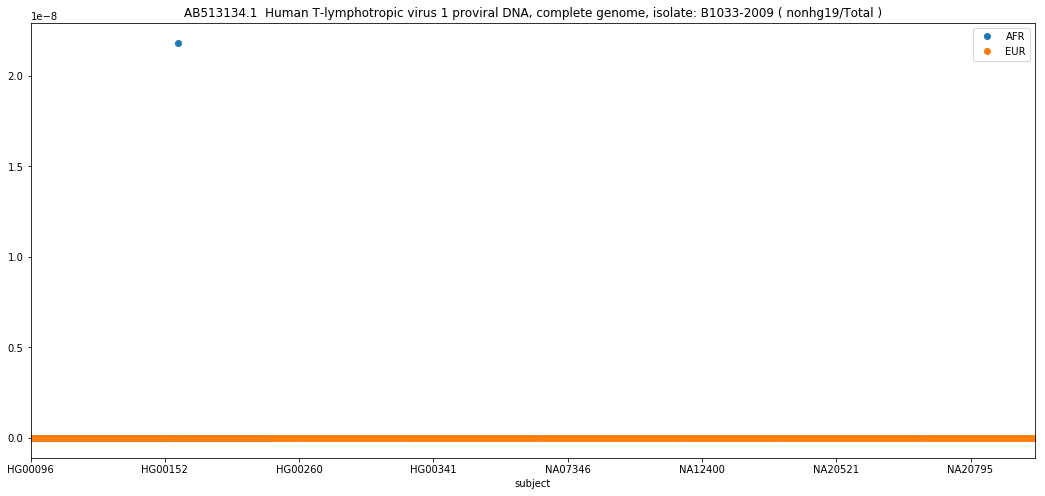

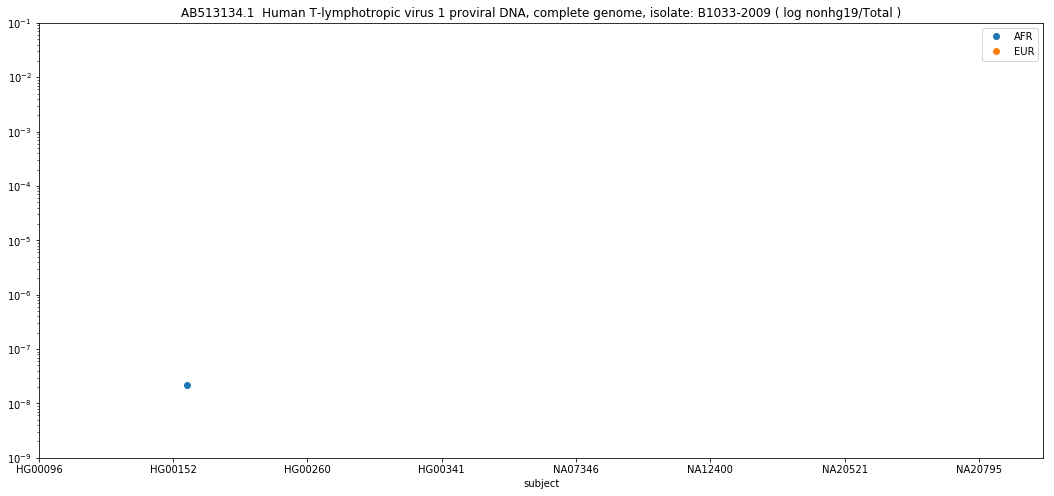

AB618031.1  Herpes simplex virus (type 1 /strain RH2) DNA, nearly complete genome


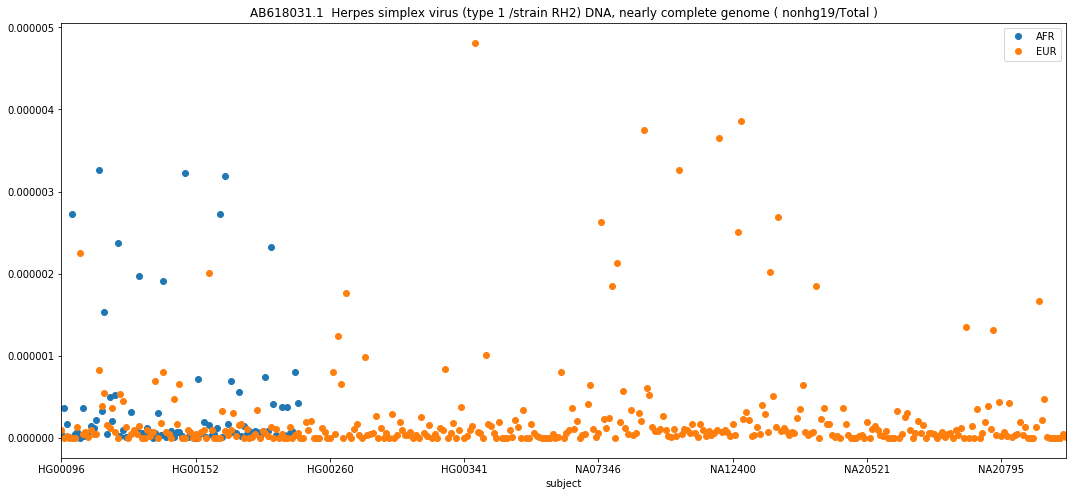

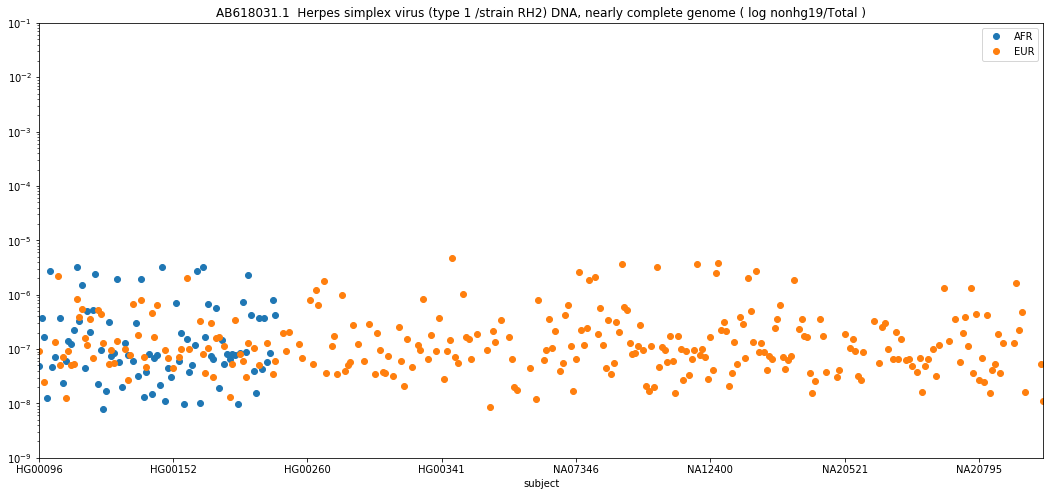

AF037218.1  Human herpesvirus 7 strain RK, complete genome


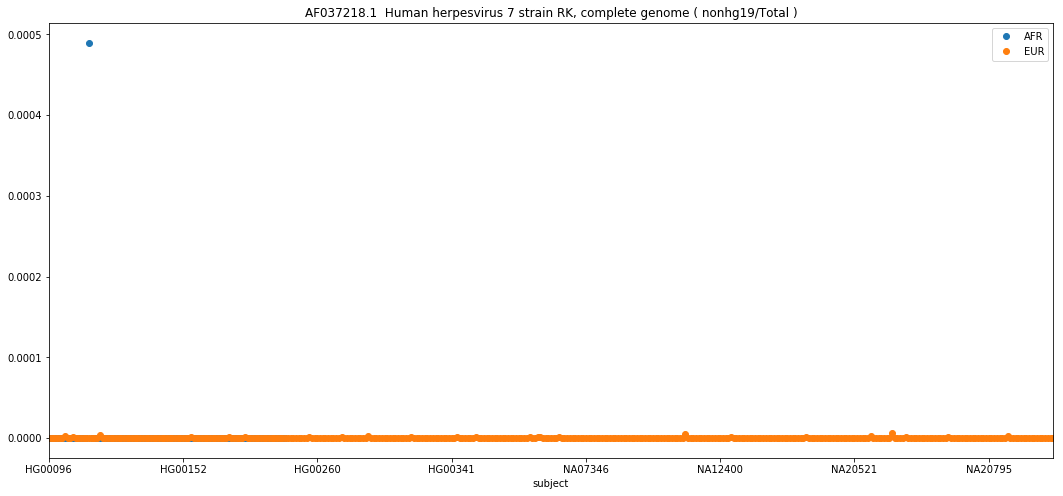

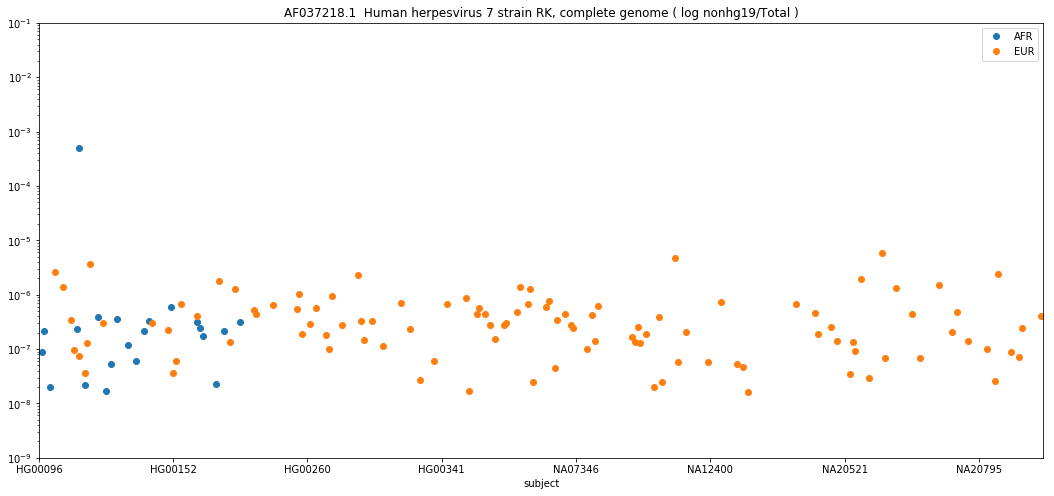

AF148805.2  Human herpesvirus 8 strain GK18, complete genome


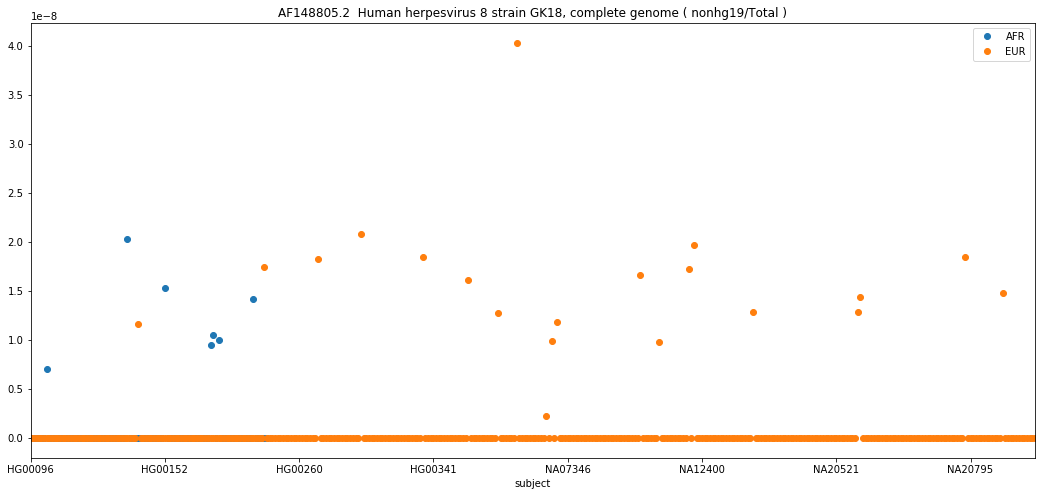

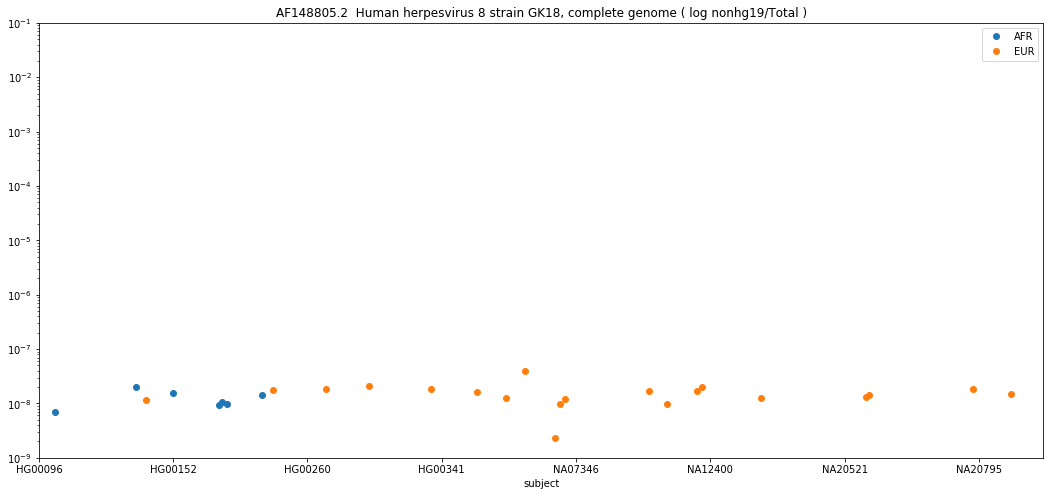

AP015015.1  Human herpesvirus 4 DNA, complete genome, strain: SNU-719


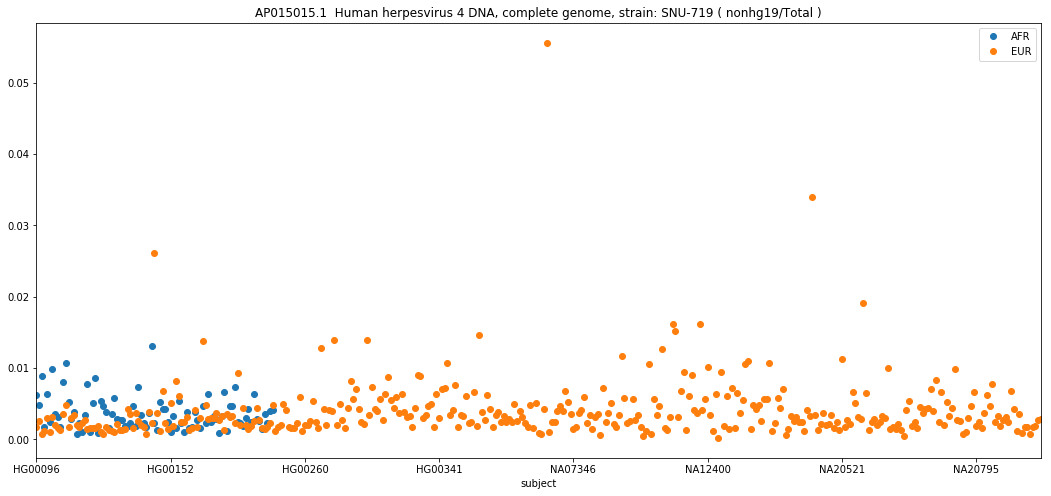

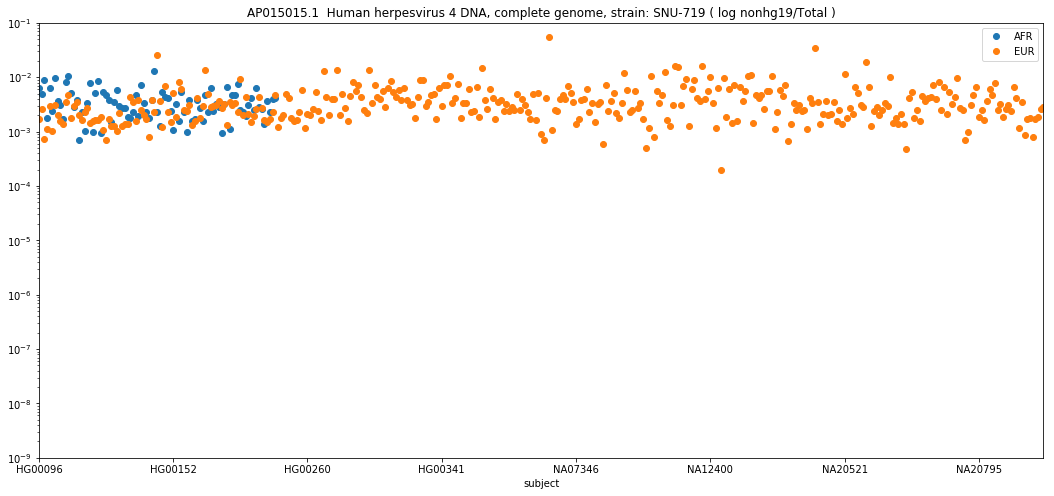

AP015016.1  Human herpesvirus 4 DNA, complete genome, strain: YCCEL1


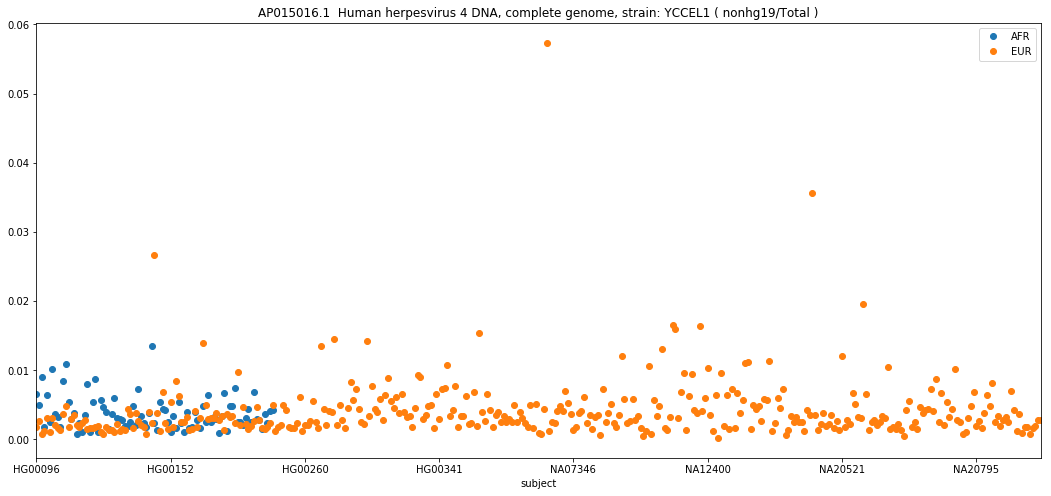

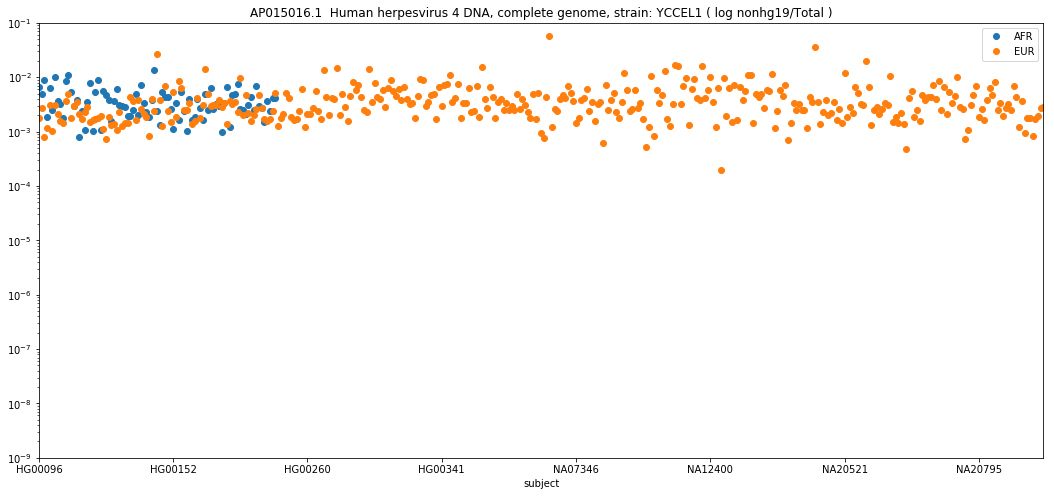

AP017458.1  Human herpesvirus 8 DNA, complete genome, strain: SPEL


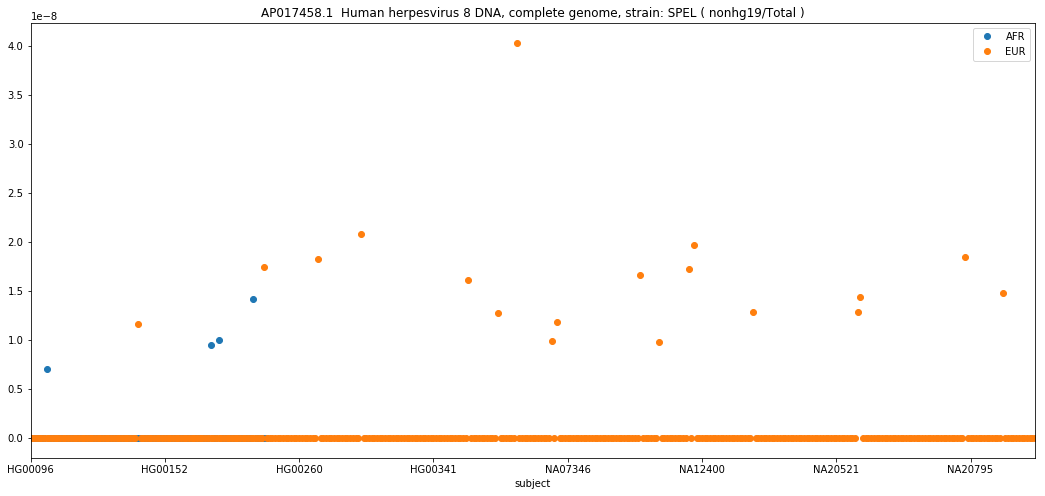

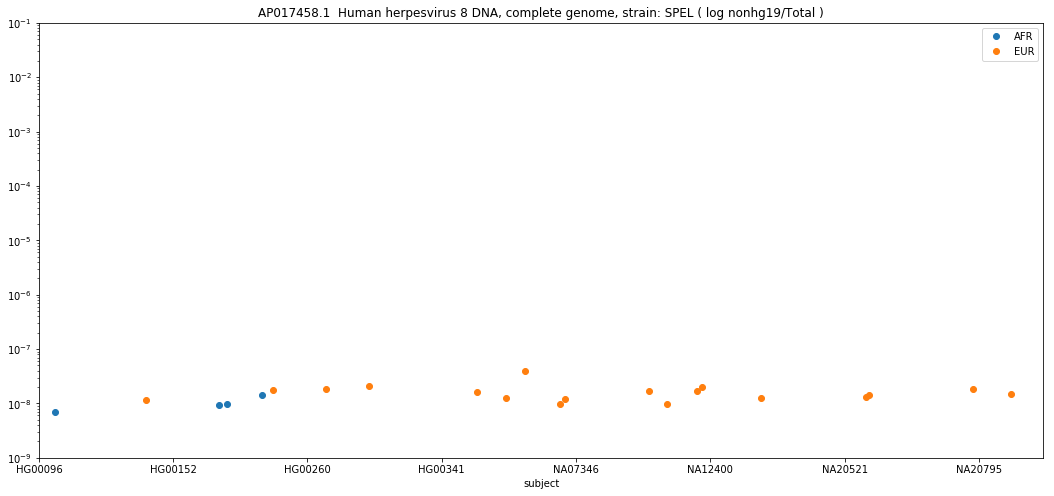

AY446894.2  Human herpesvirus 5 strain Merlin, complete genome


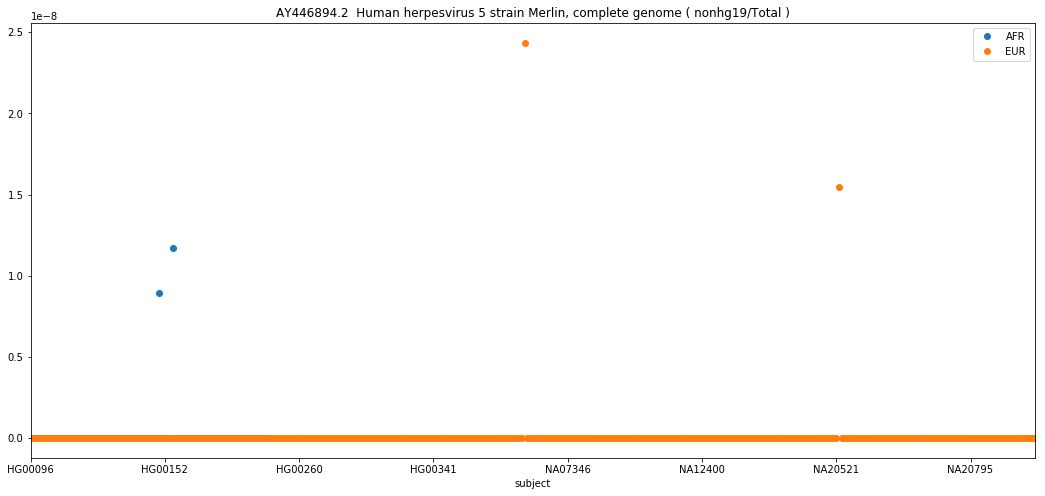

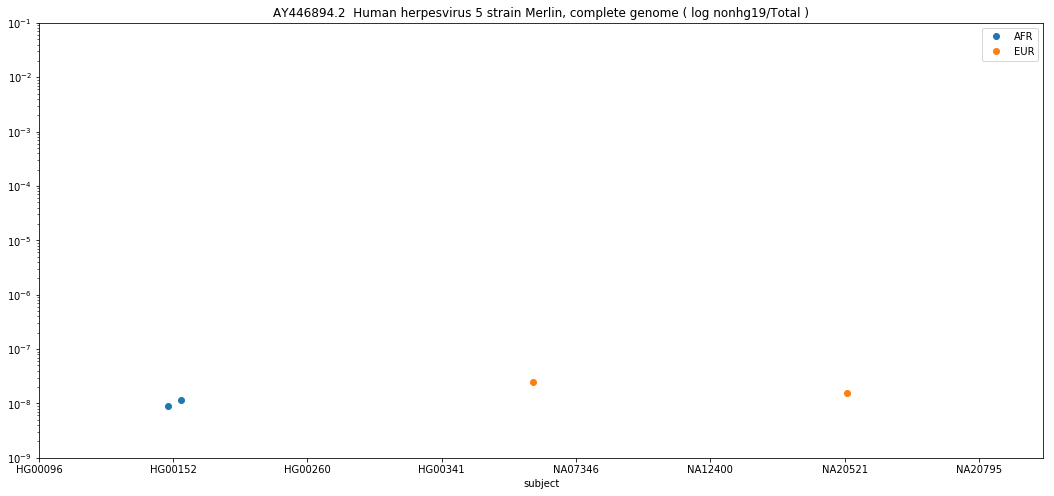

D13784.1  Human T-lymphotropic virus 1 proviral DNA, complete genome


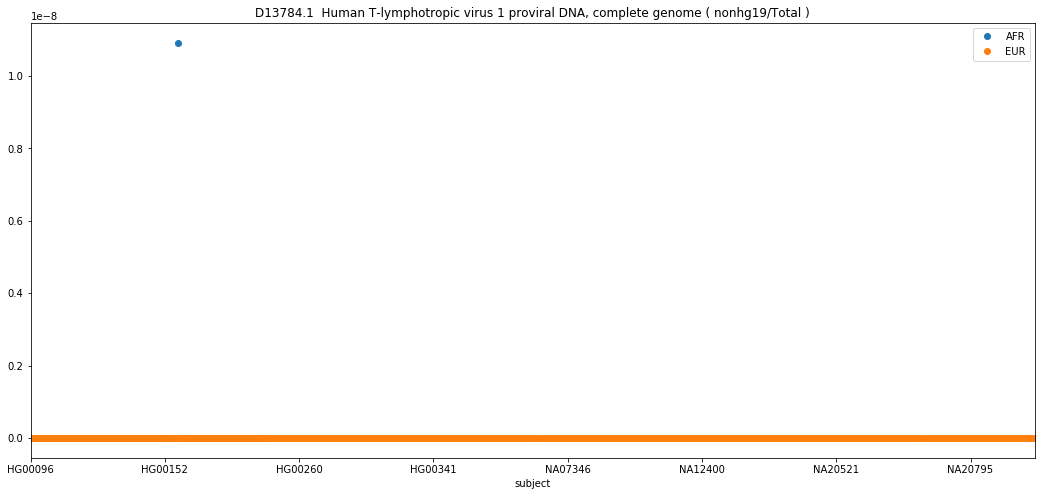

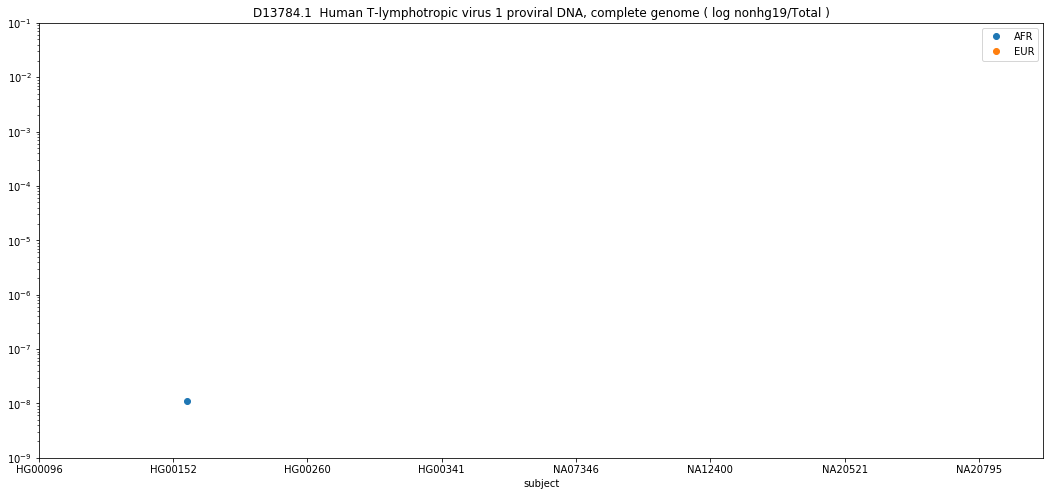

EF999921.1  Human herpesvirus 5 strain TB40/E clone TB40-BAC4, complete sequence


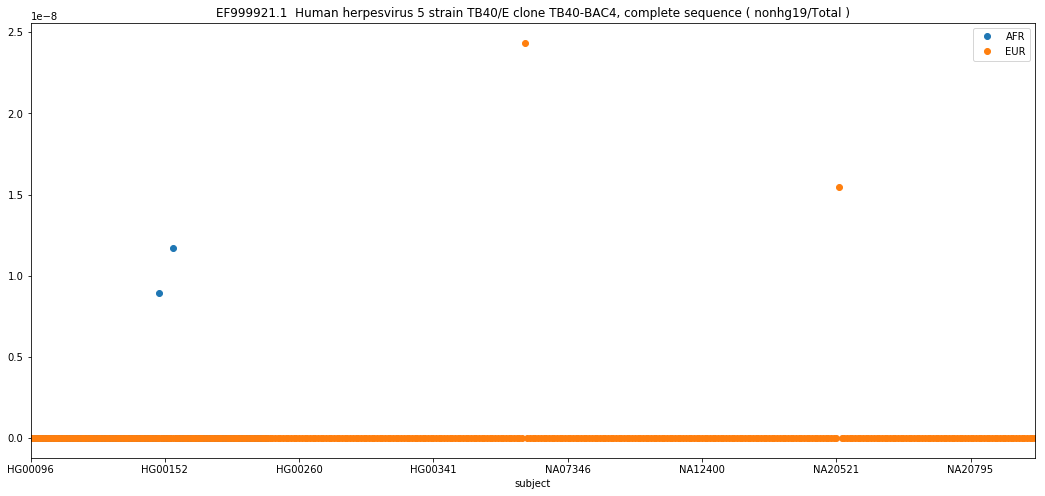

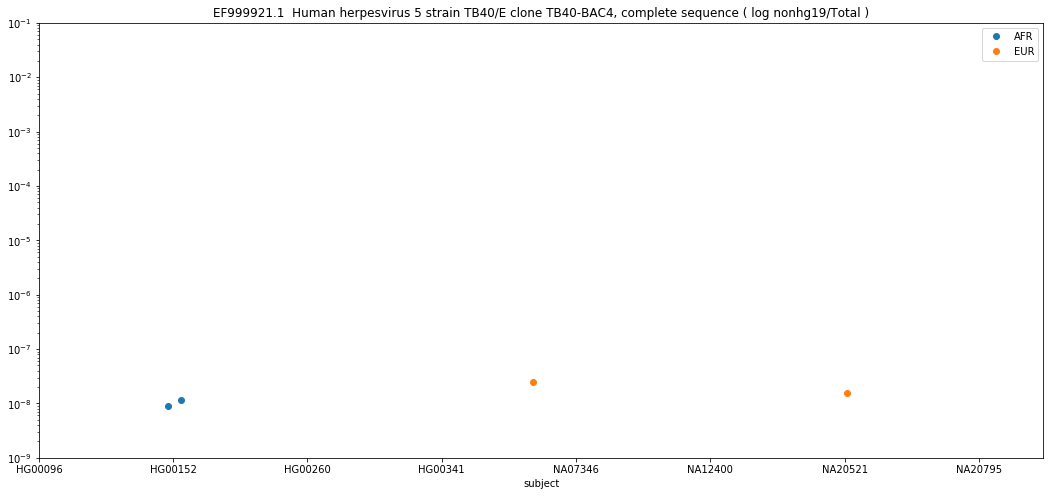

FJ527563.1  Human herpesvirus 5 strain AD169, complete genome


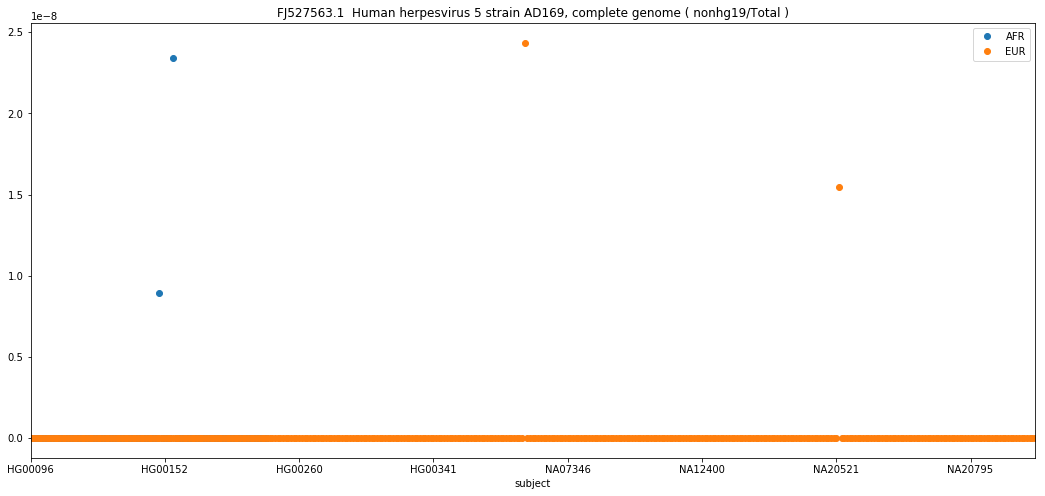

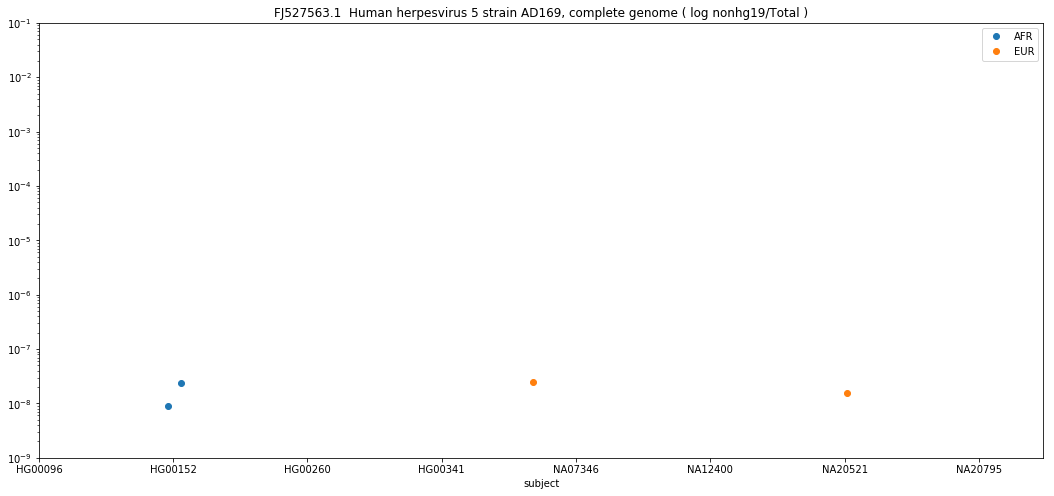

GQ221974.1  Human herpesvirus 5 strain 3157, complete genome


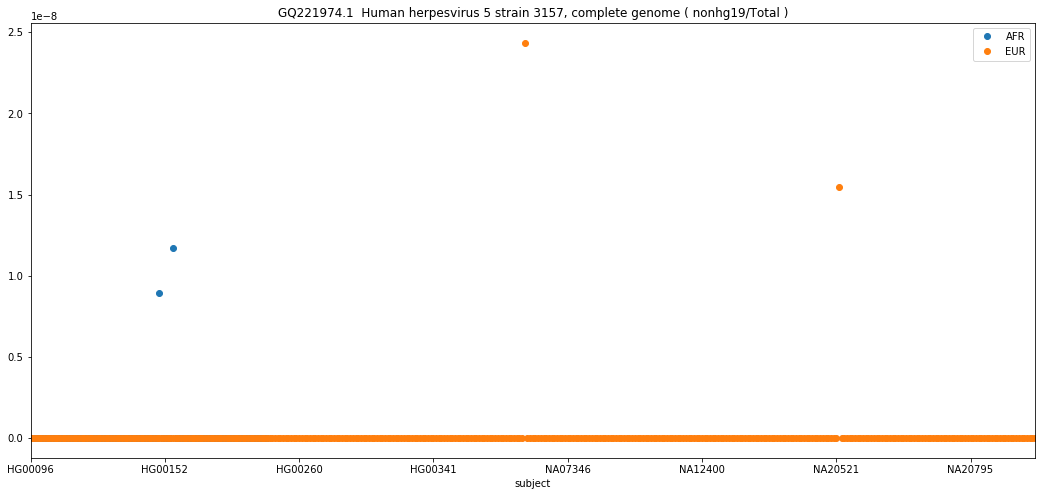

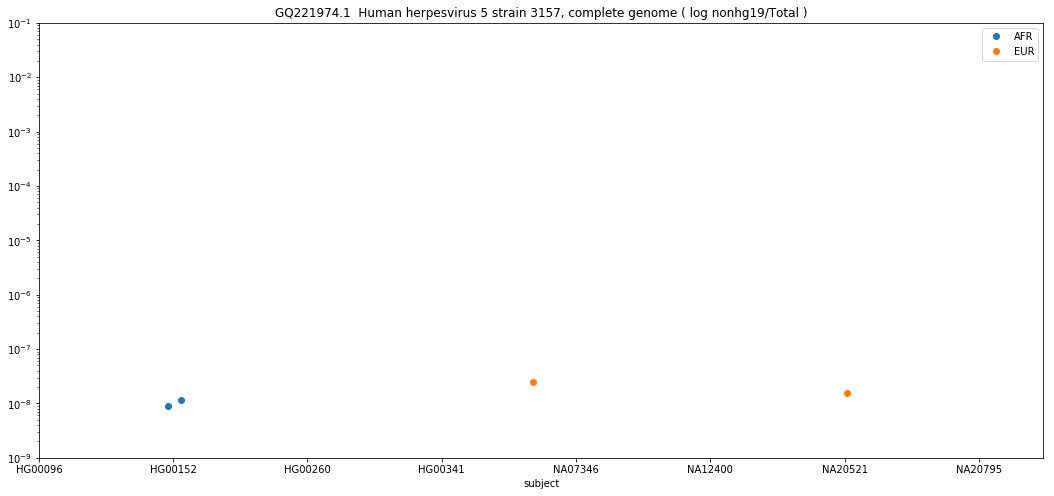

GQ396662.1  Human herpesvirus 5 strain HAN38, complete genome


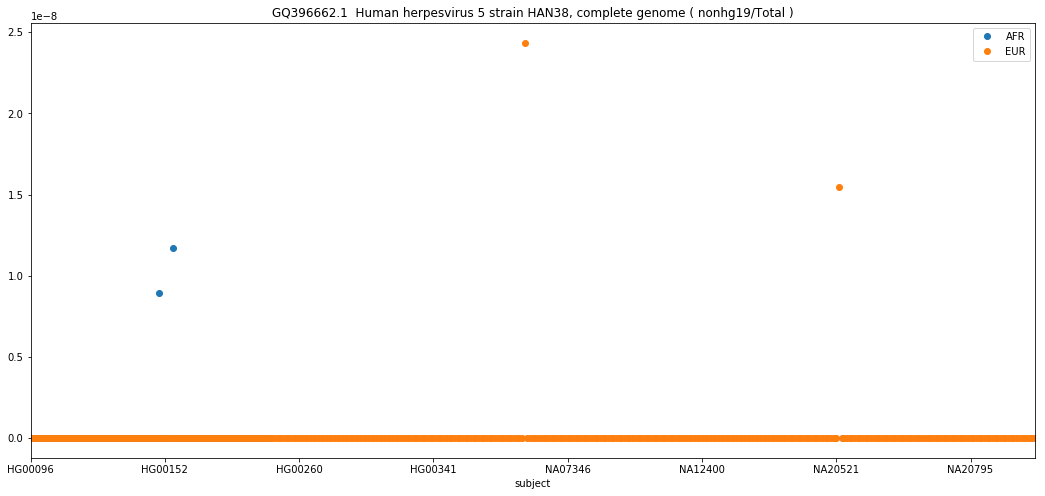

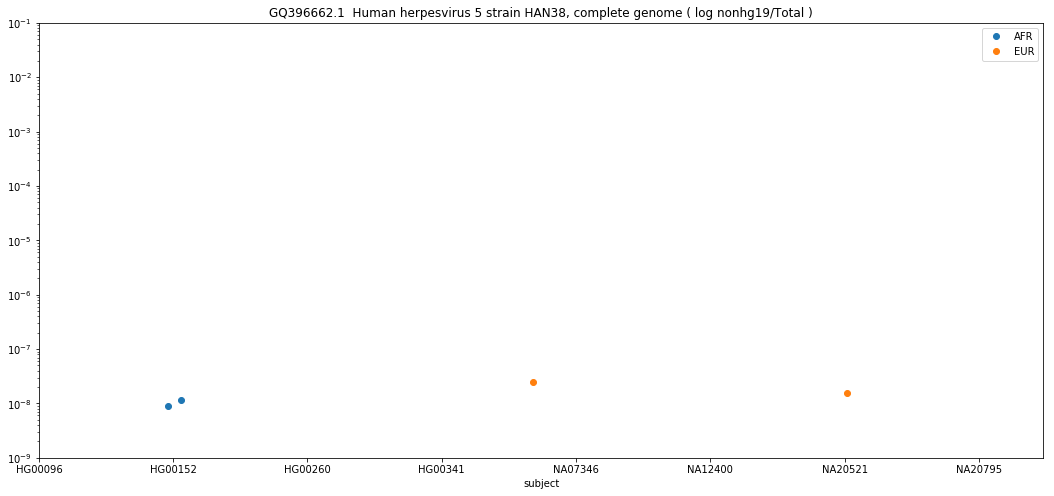

GQ994935.1  Human herpesvirus 8 strain JSC-1 clone BAC16, complete genome


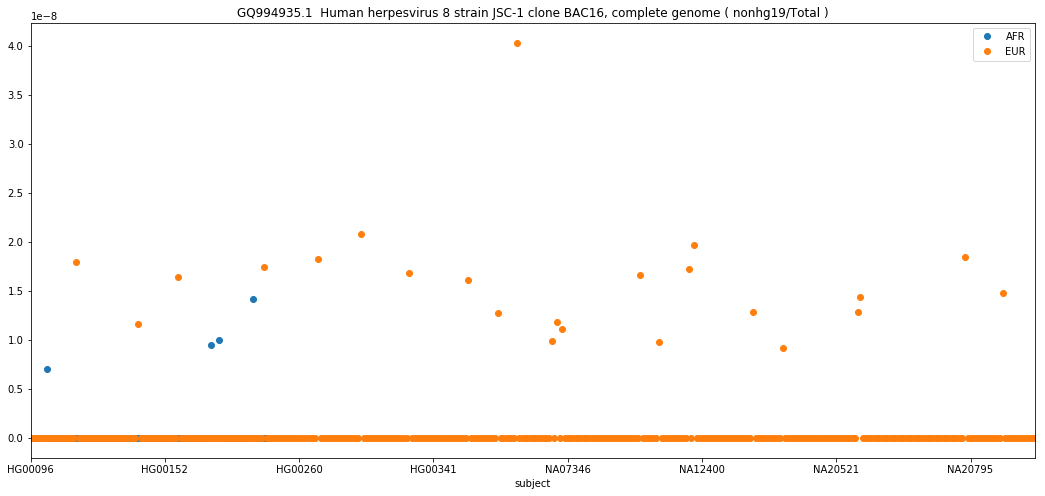

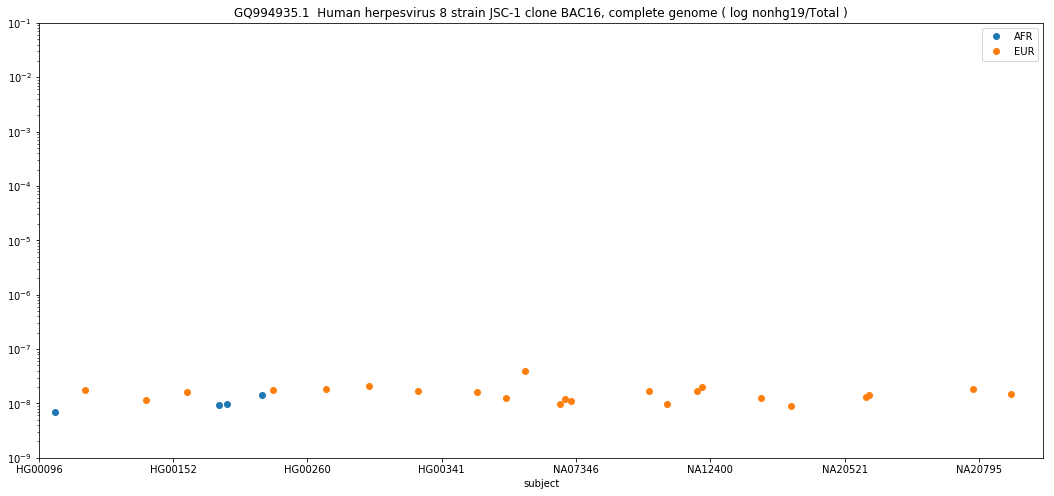

GU937742.2  Human herpesvirus 5 strain Toledo, complete genome


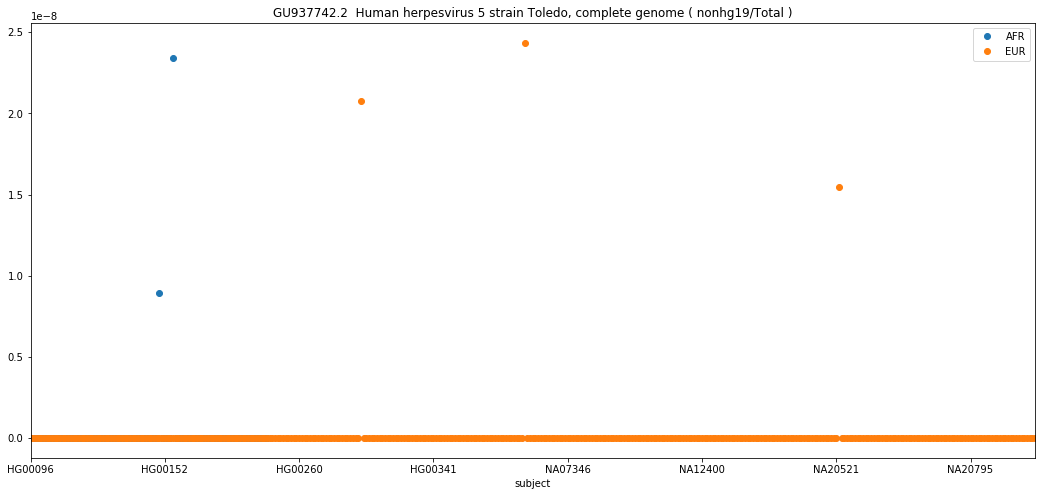

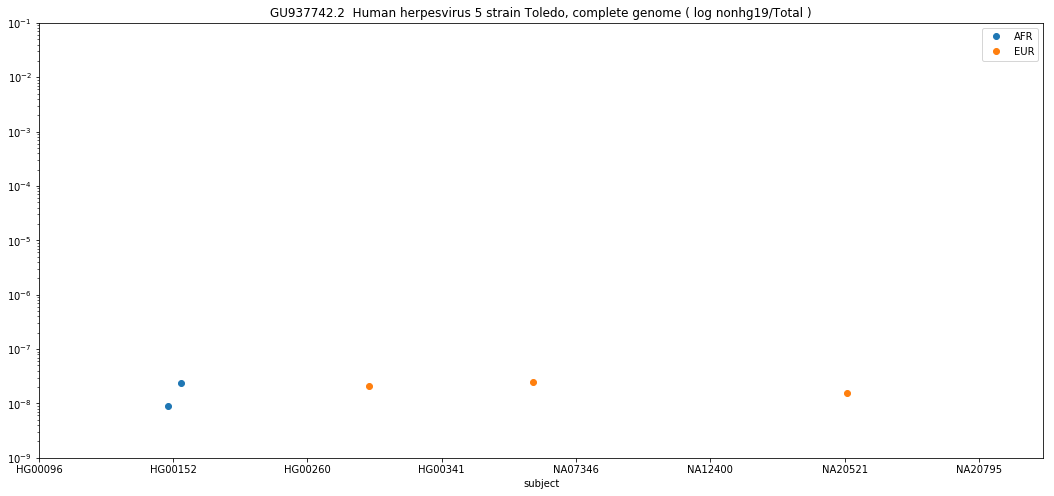

JQ619843.1  Human herpesvirus 8 strain DG1, complete genome


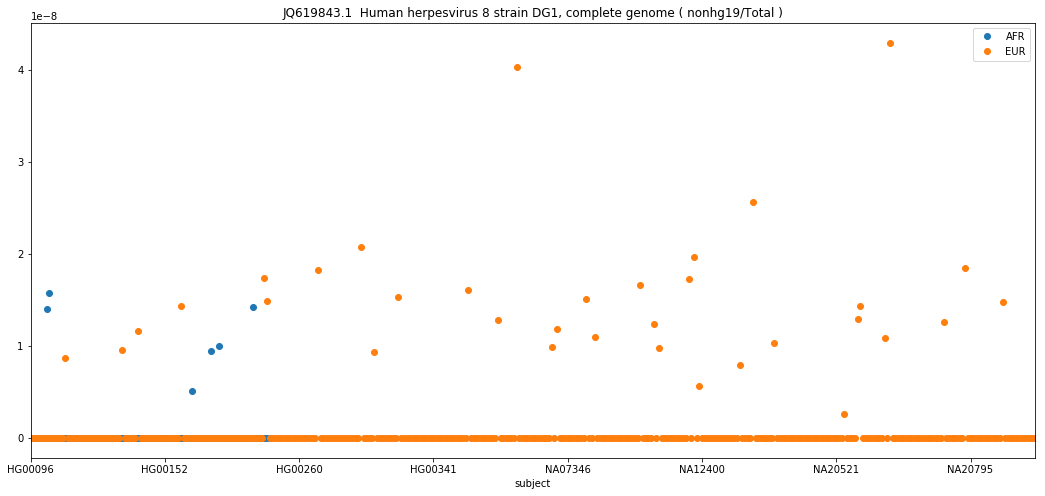

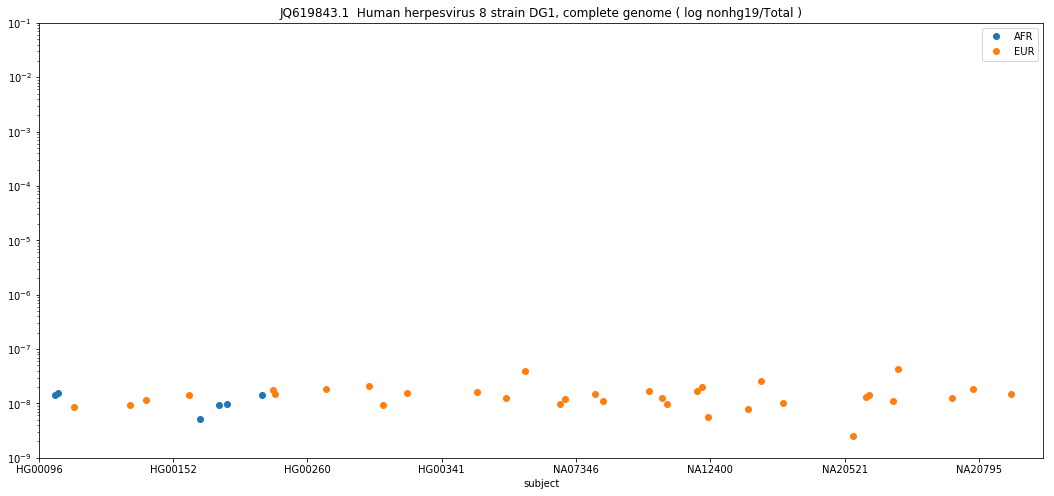

KF021605.1  Human herpesvirus 5 strain TR, complete genome


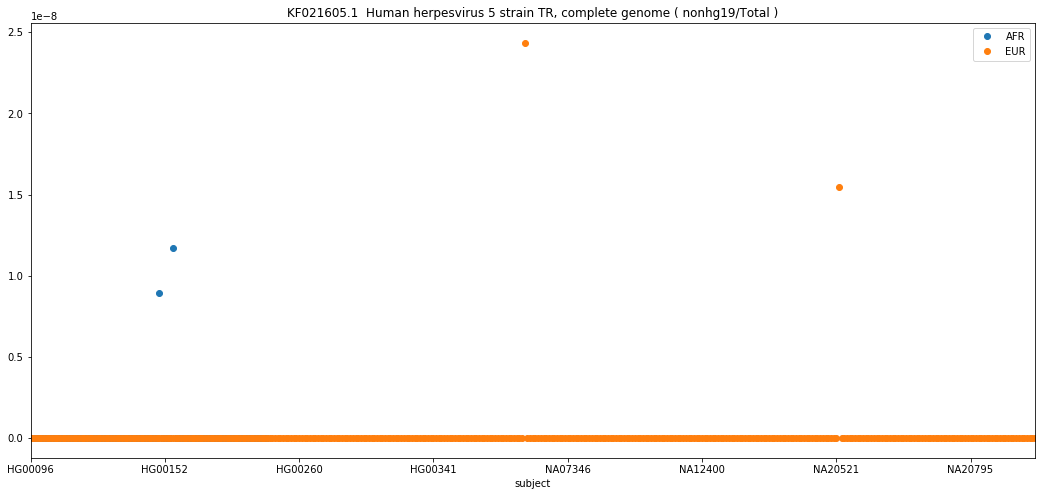

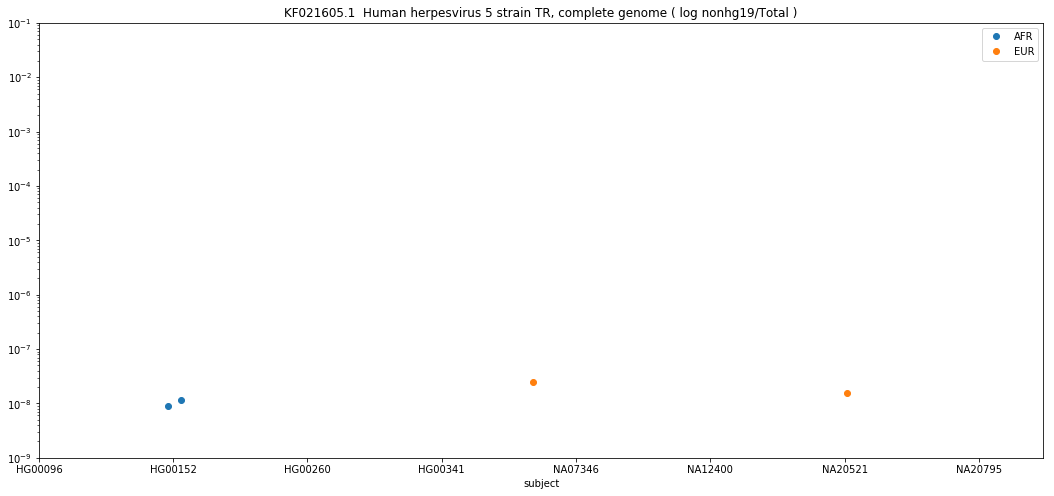

KF297339.1  Human herpesvirus 5 strain TB40/E clone Lisa, complete genome


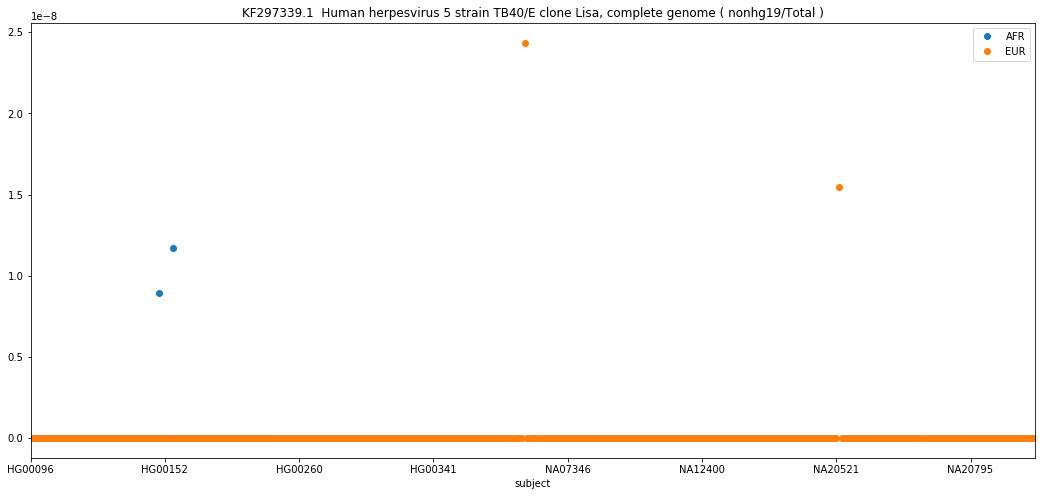

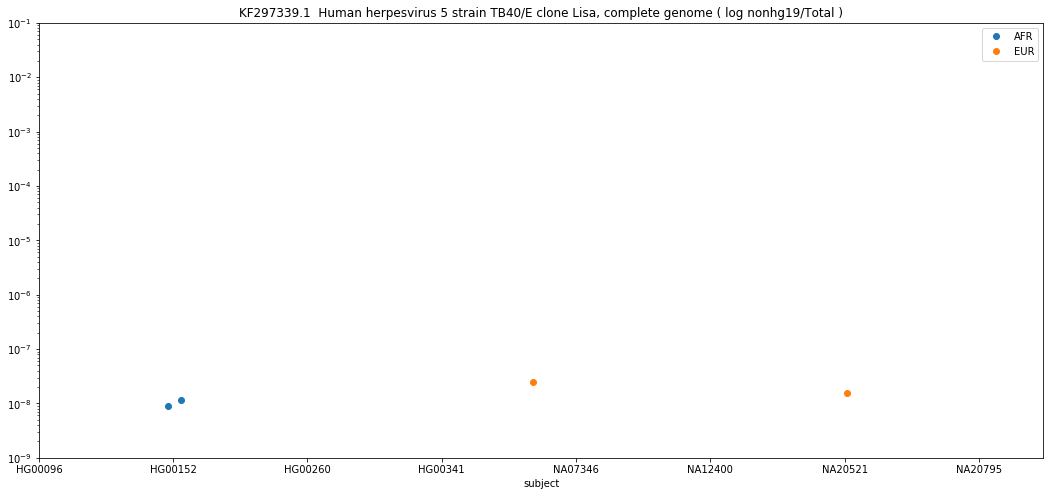

KF588566.1  Human herpesvirus 8 clone BrK.219#1_4, complete genome


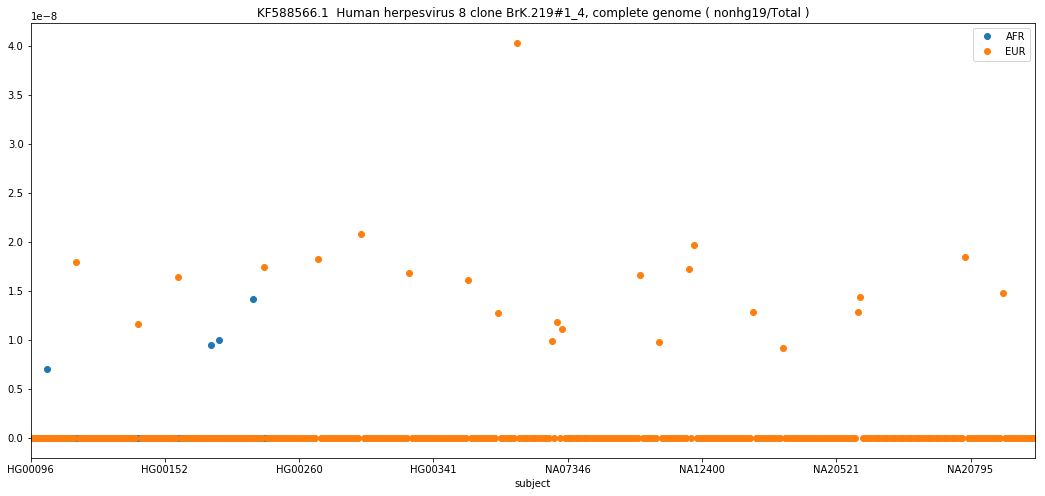

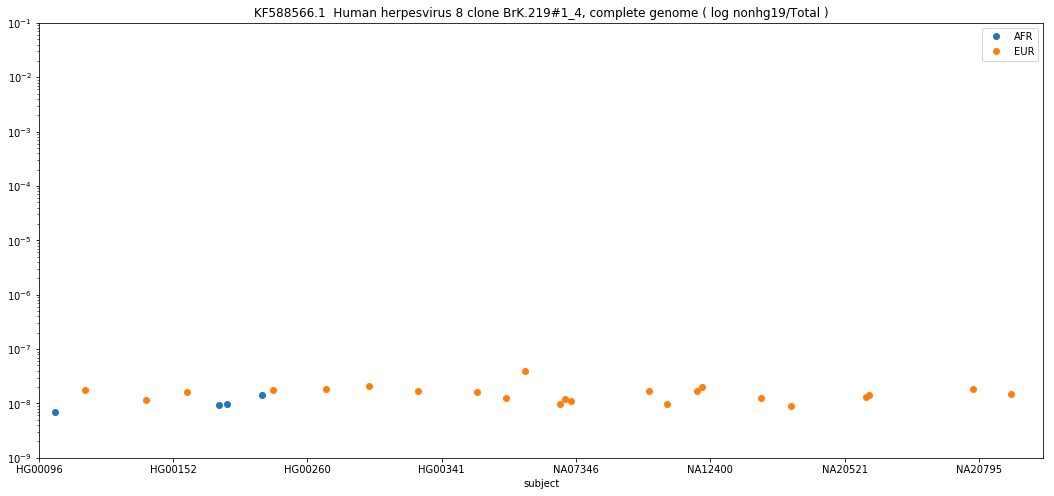

KP257584.1  Human herpesvirus 6A isolate AJ, complete genome


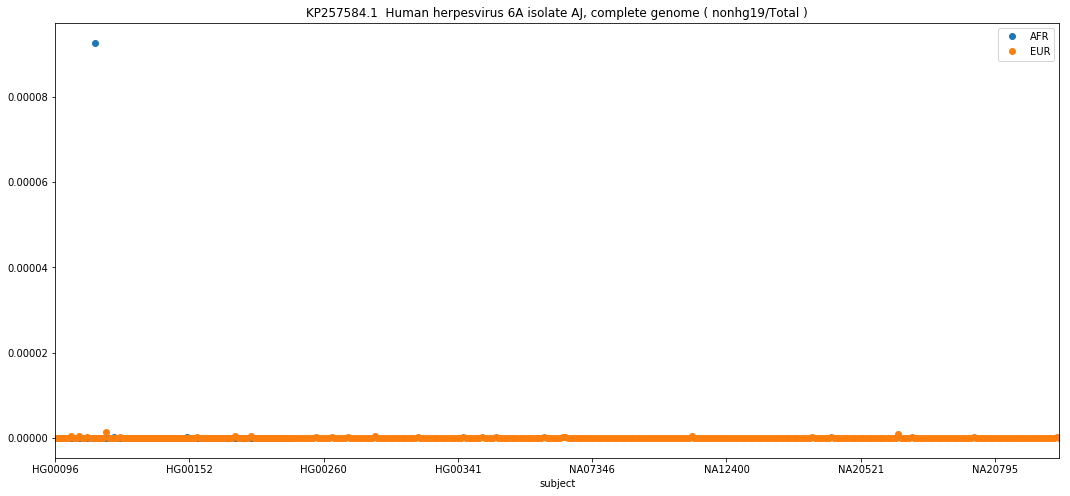

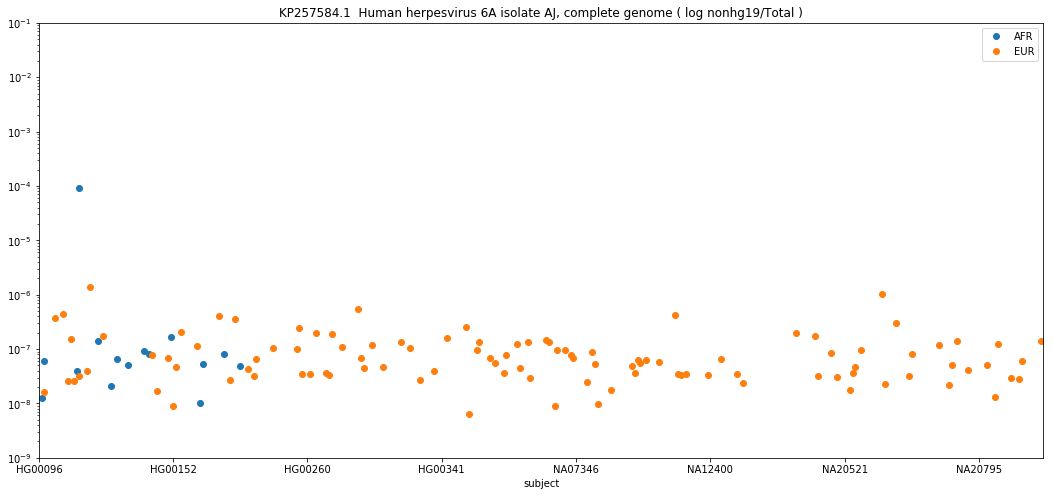

KX905202.1  Human T-lymphotropic virus 1 isolate VAN-EM5, complete genome


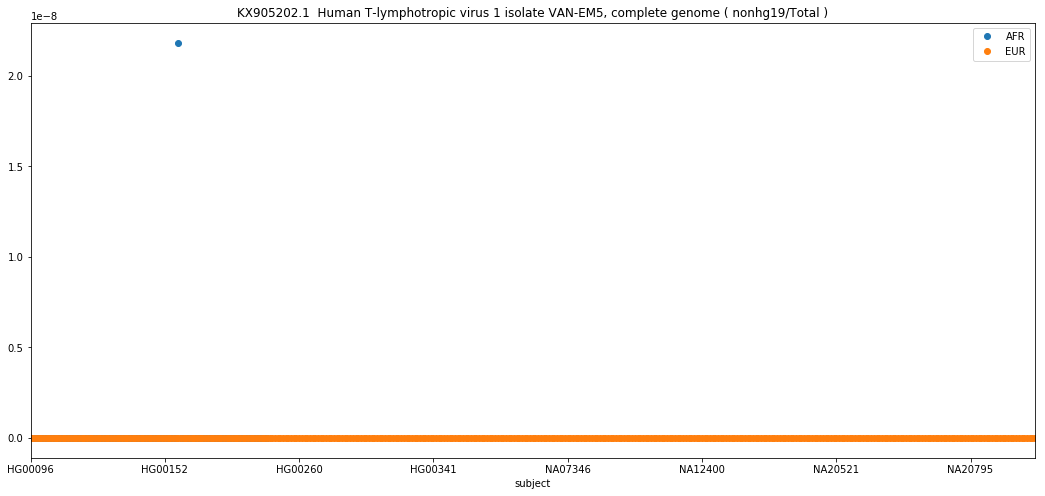

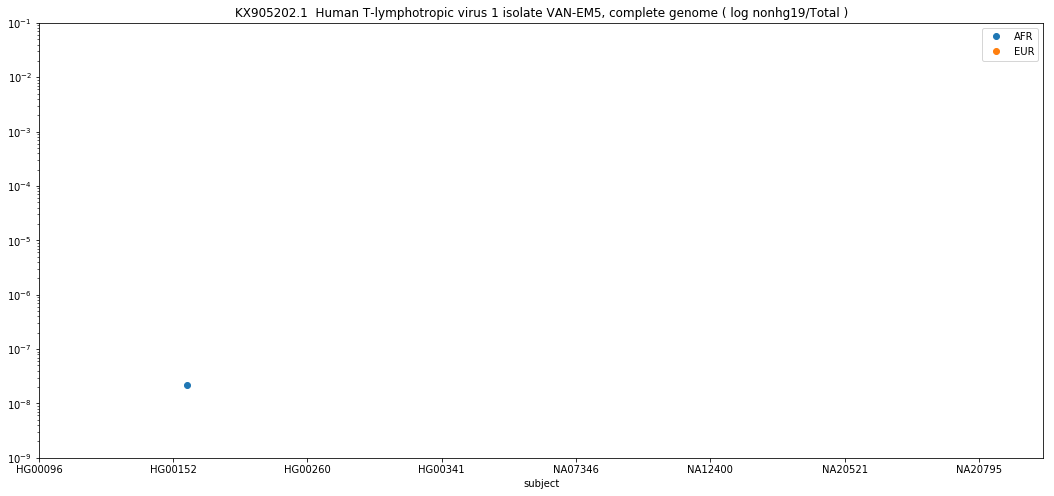

KY002685.1  Human adenovirus isolate Yunnan/KM04/2016, complete genome


/Users/jakewendt/Library/Python/3.6/lib/python/site-packages/matplotlib/ticker.py:2198: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


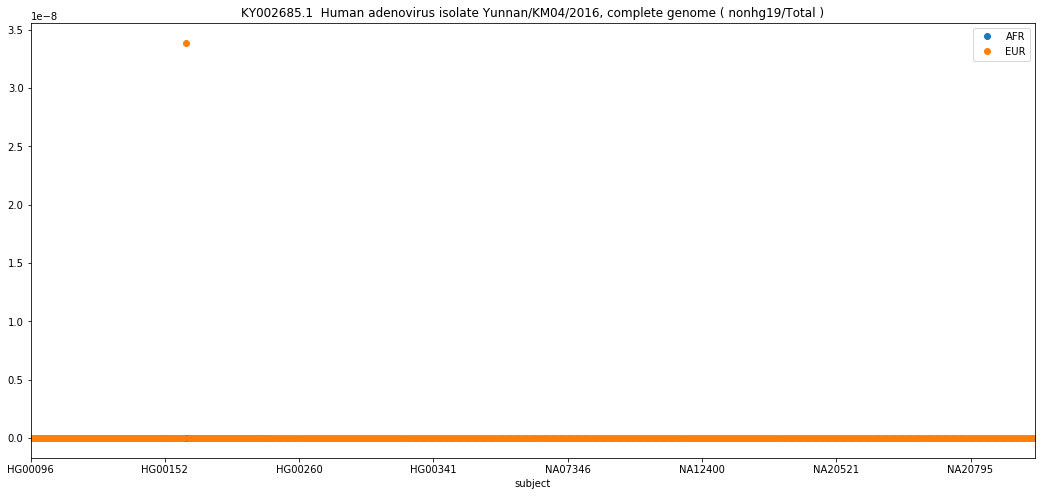

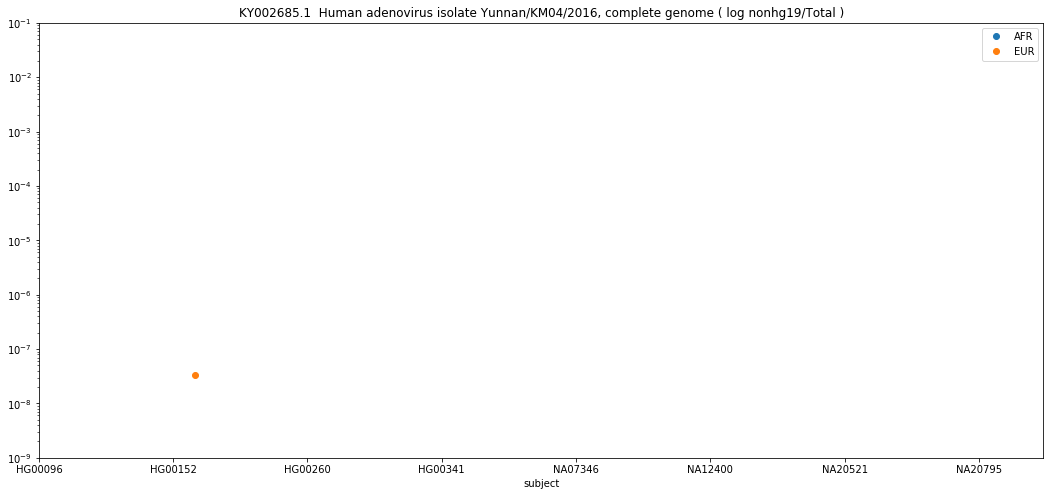

KY094066.1  BeAn 58058 virus, complete genome


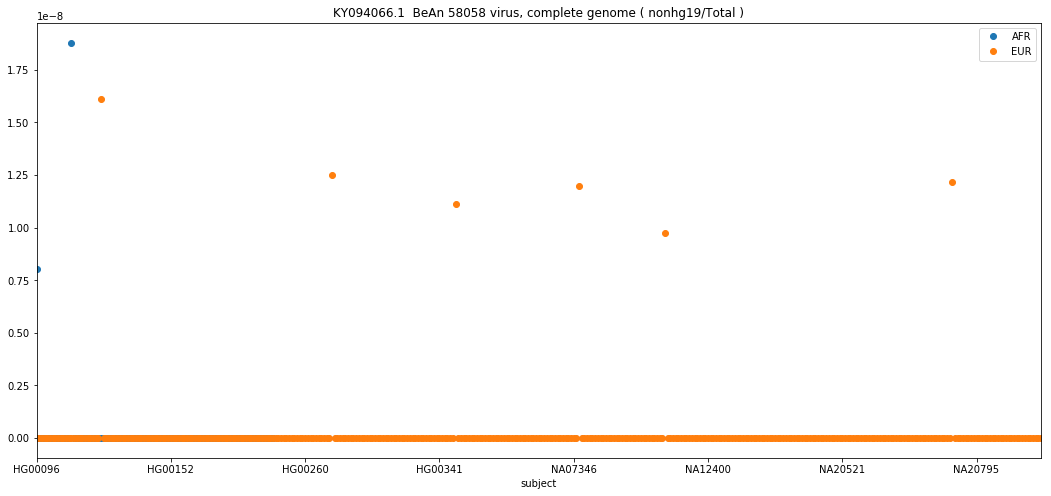

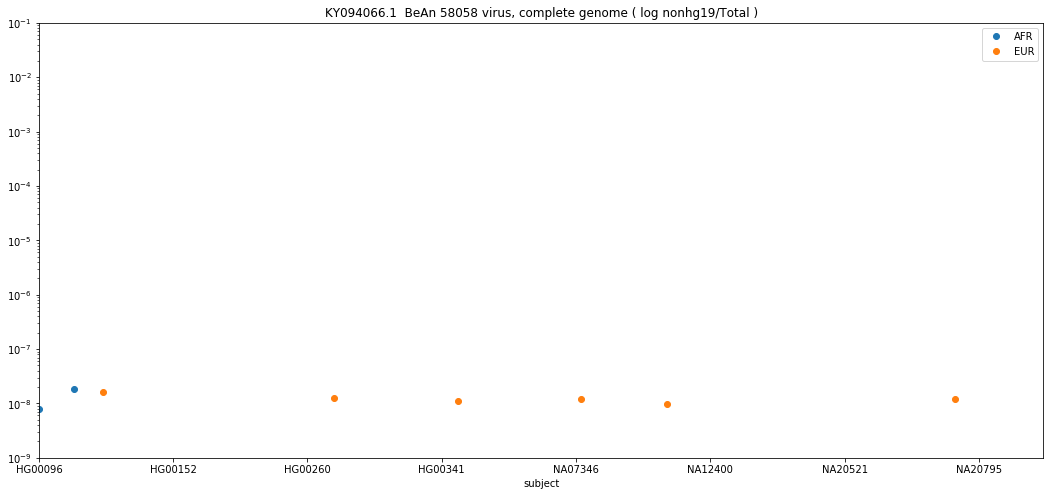

LC215429.1  Human adenovirus DNA, complete genome, strain: case67_20121578


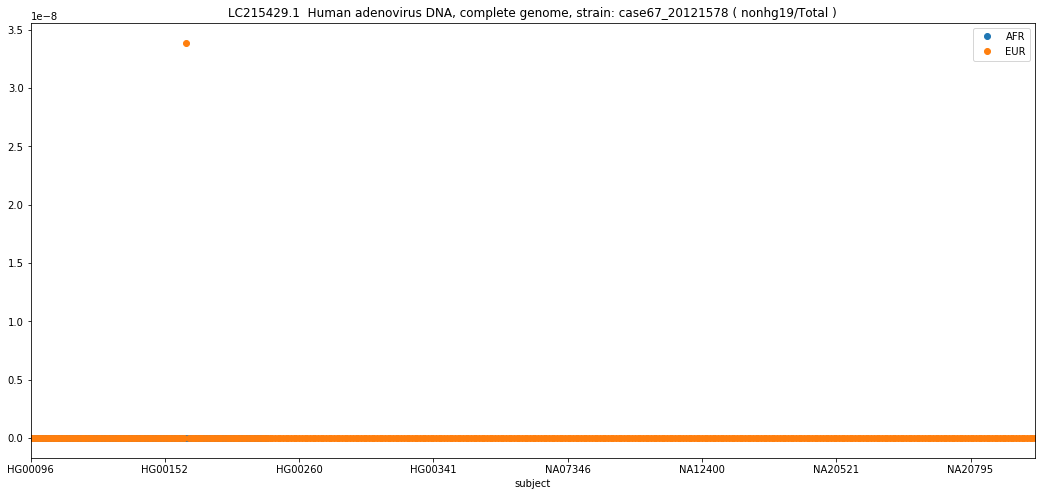

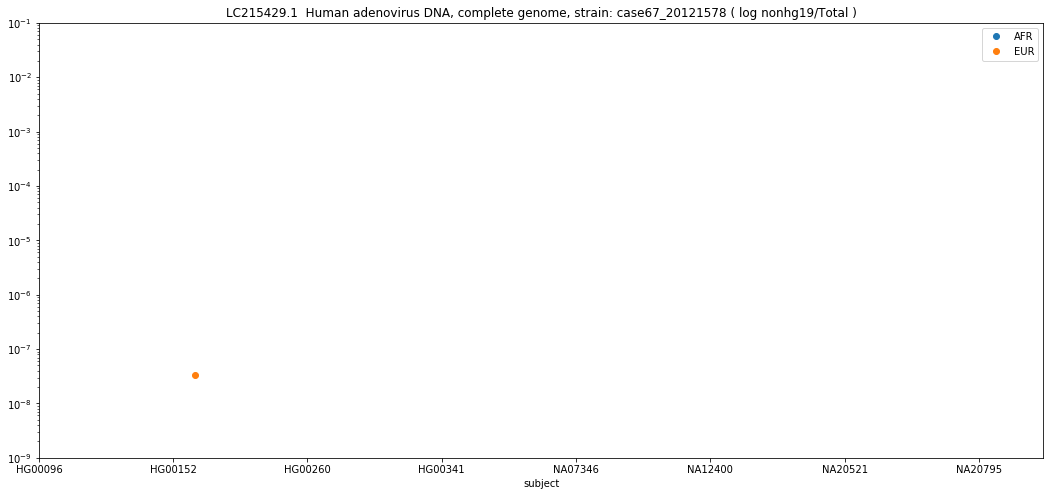

LC215433.1  Human adenovirus DNA, complete genome, strain: case110_20131573


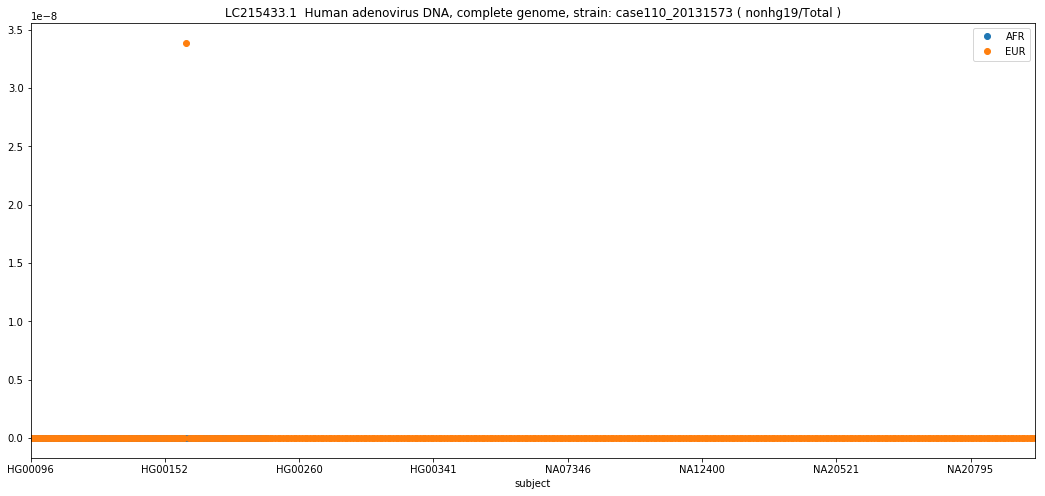

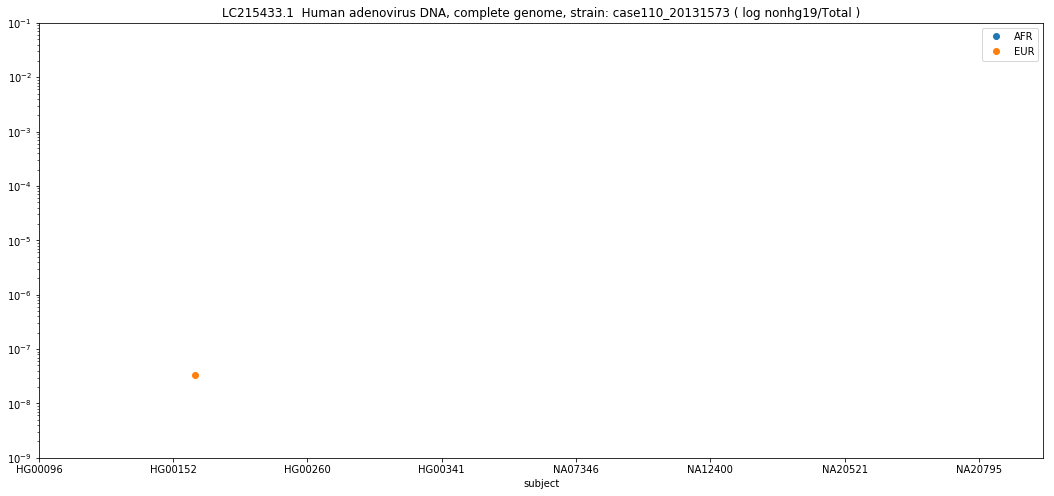

LC215434.1  Human adenovirus DNA, complete genome, strain: case111_20131575


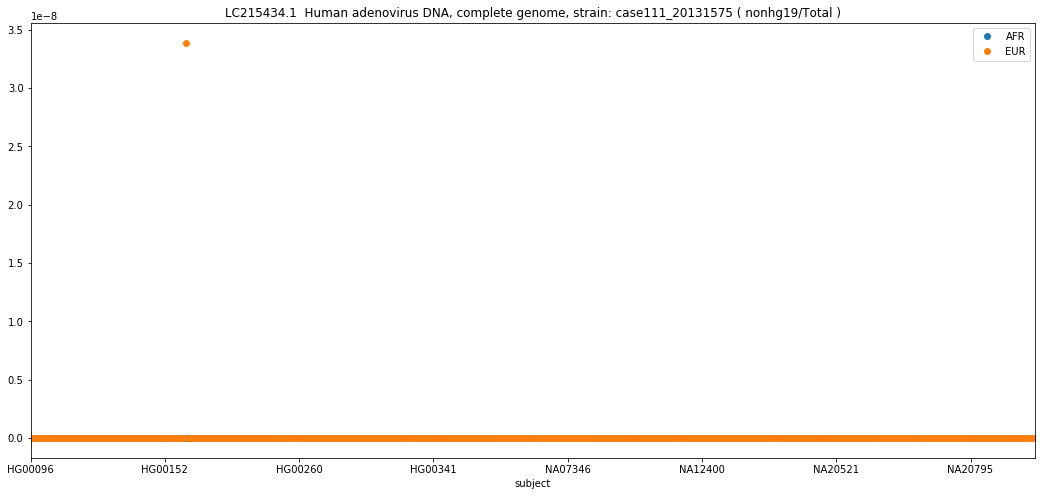

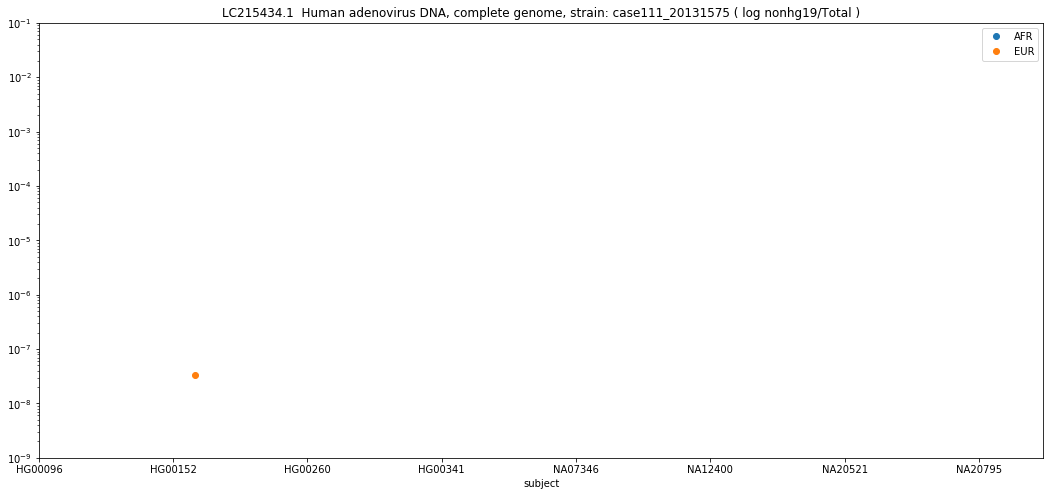

LC215435.1  Human adenovirus DNA, complete genome, strain: case112_20131578


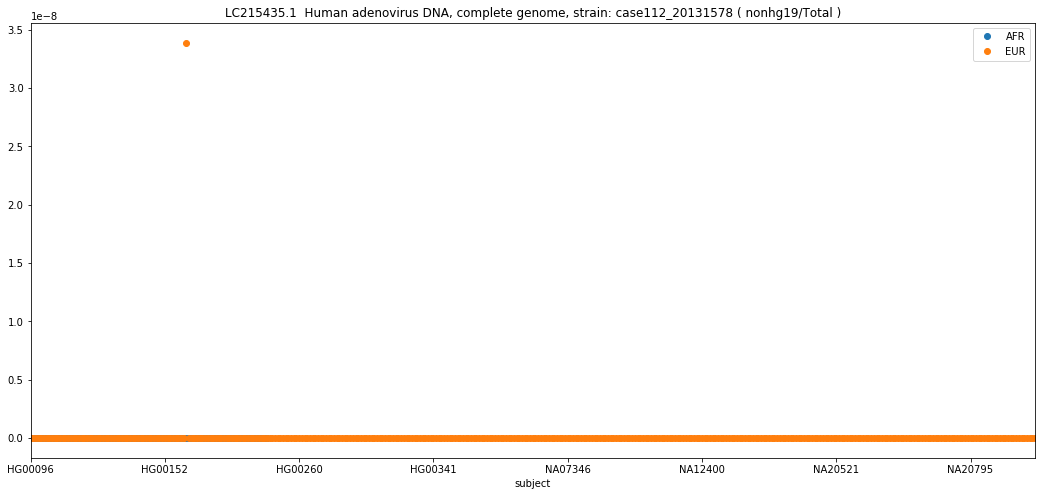

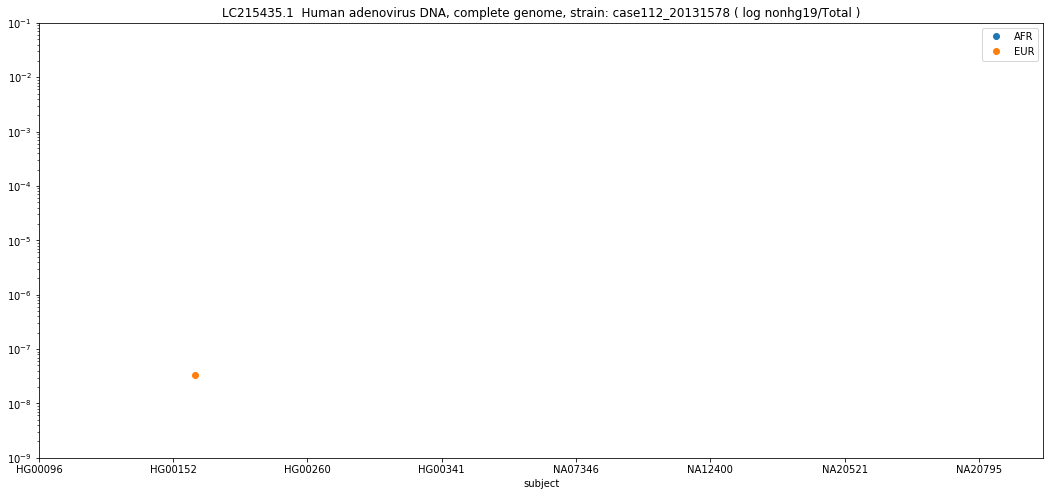

LC215436.1  Human adenovirus DNA, complete genome, strain: case113_20131581


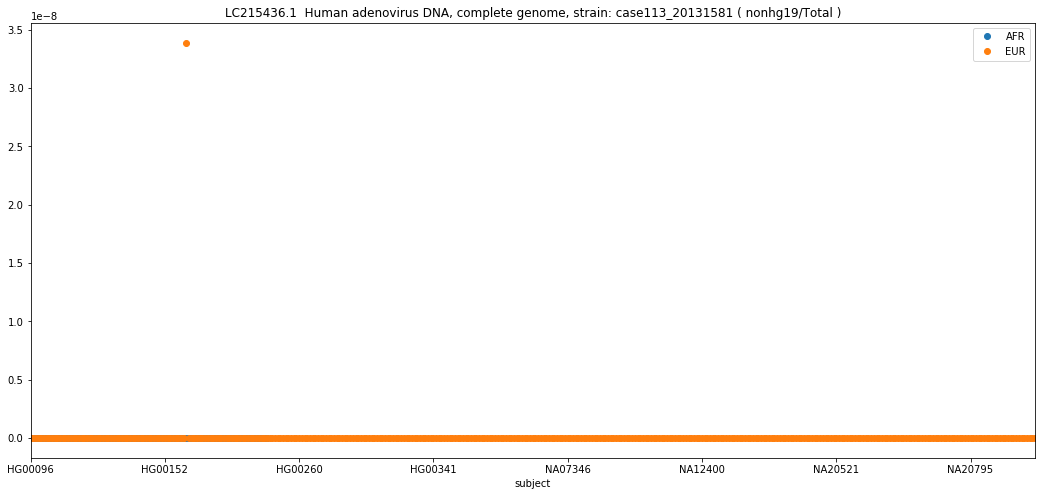

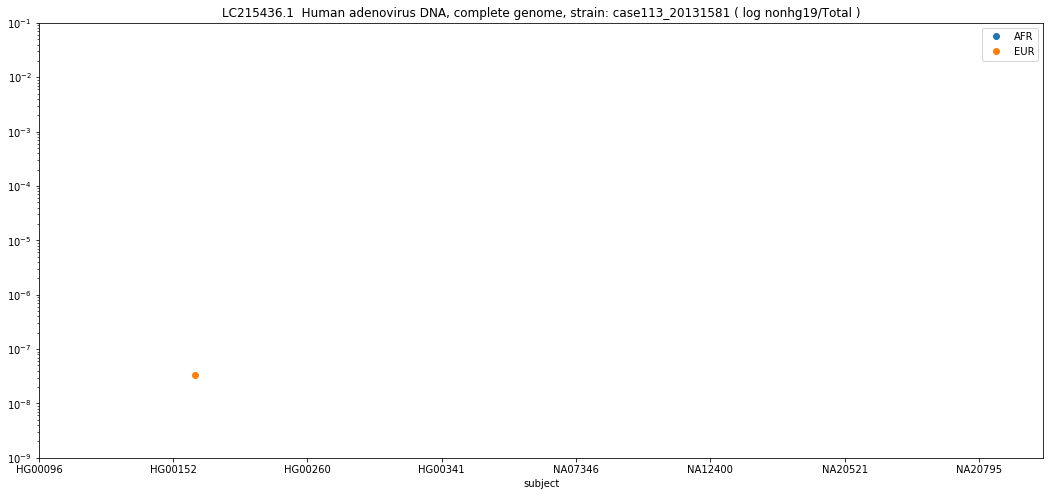

LC215437.1  Human adenovirus DNA, complete genome, strain: case118_20131587


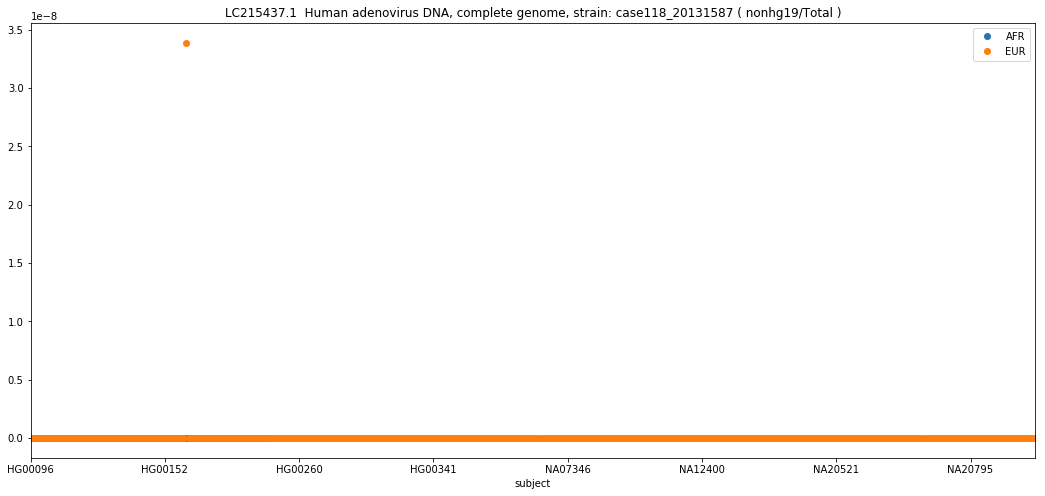

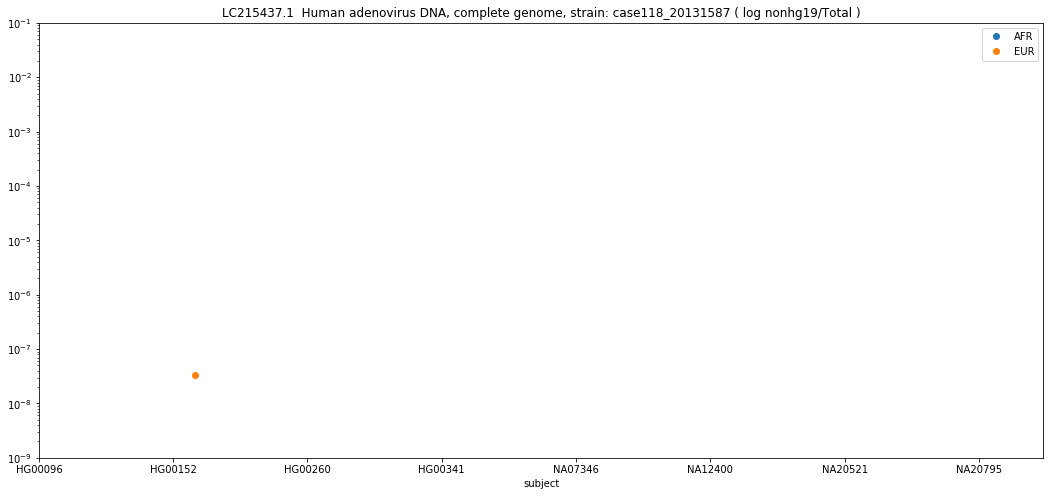

NC_000898.1  Human herpesvirus 6B, complete genome


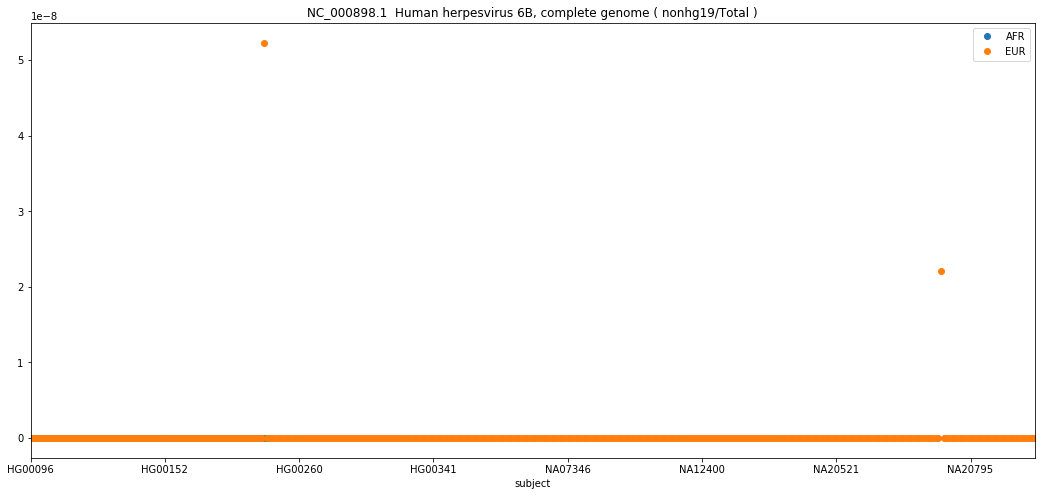

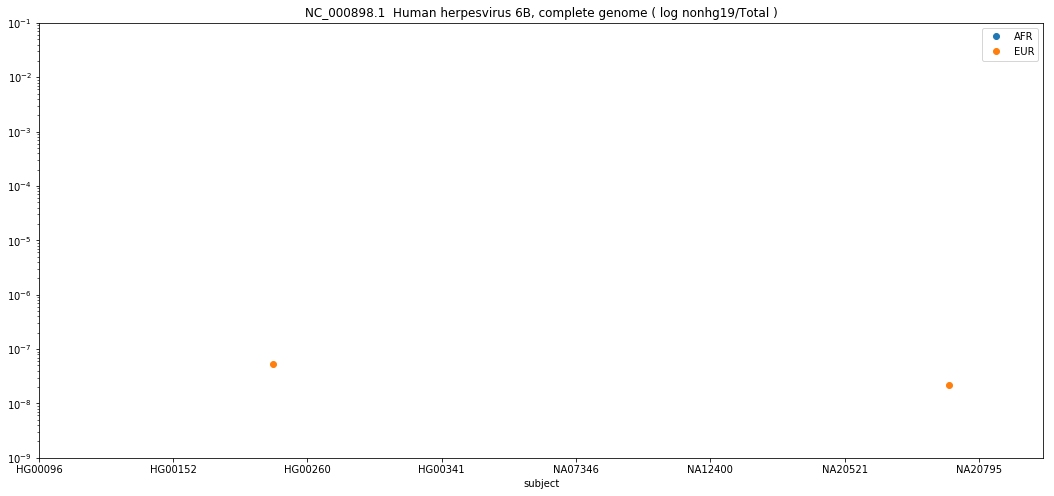

NC_001664.4  Human betaherpesvirus 6A, variant A DNA, complete virion genome, isolate U1102


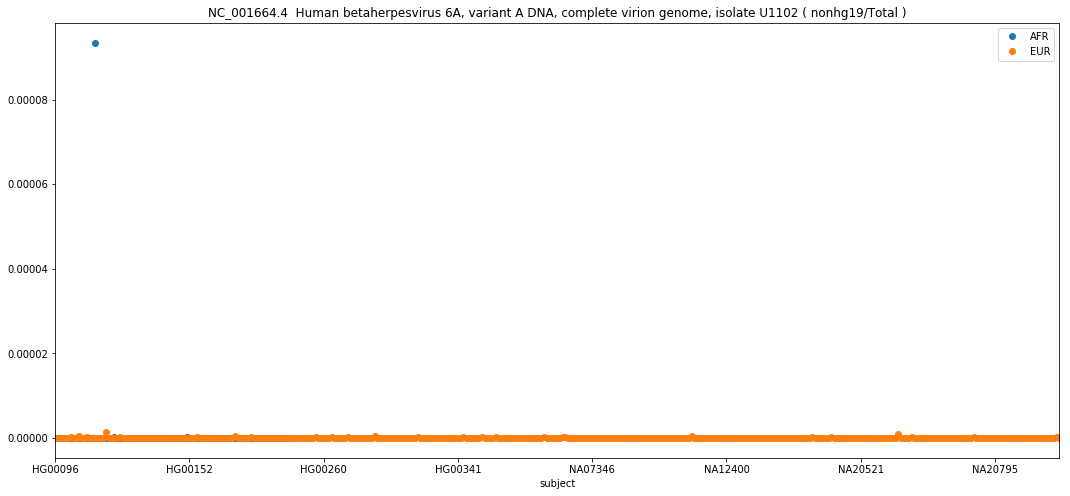

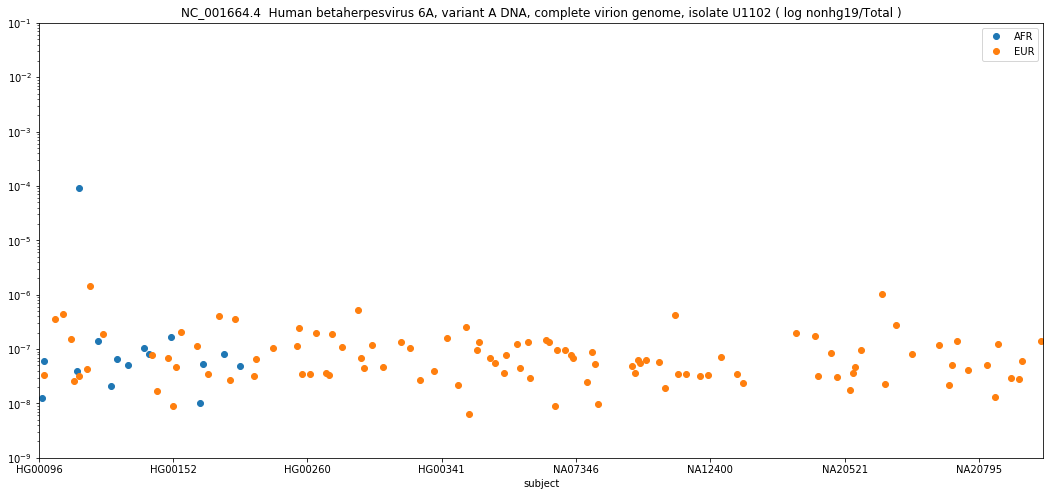

NC_001716.2  Human herpesvirus 7, complete genome


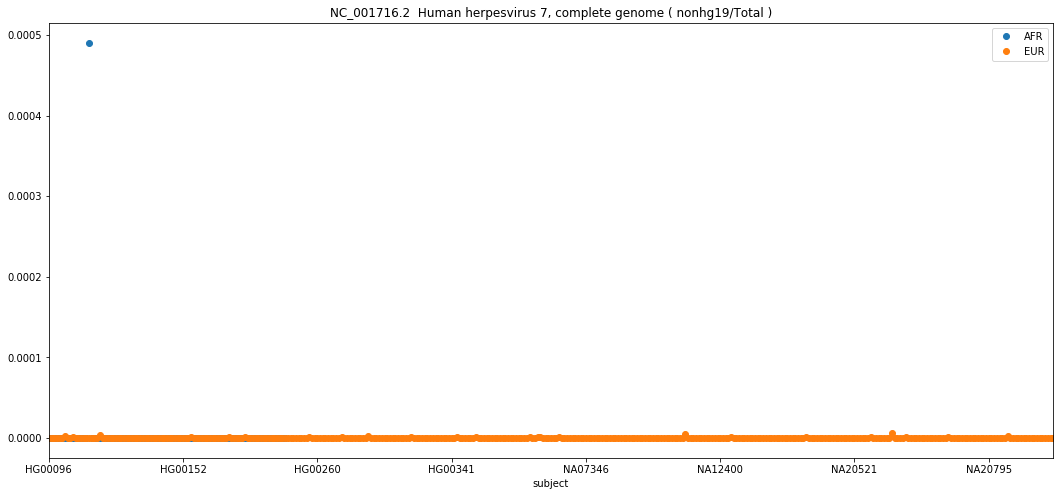

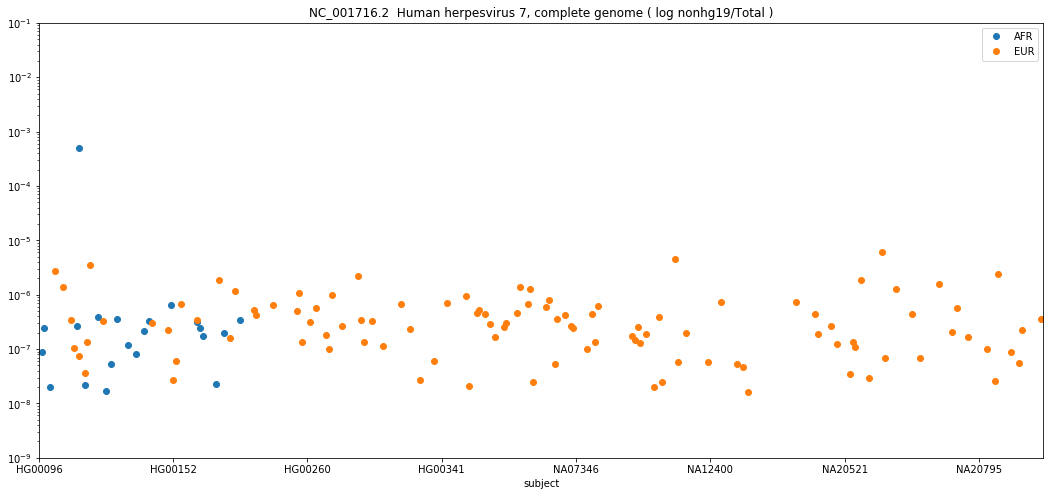

NC_003521.1  Panine herpesvirus 2 strain Heberling, complete genome


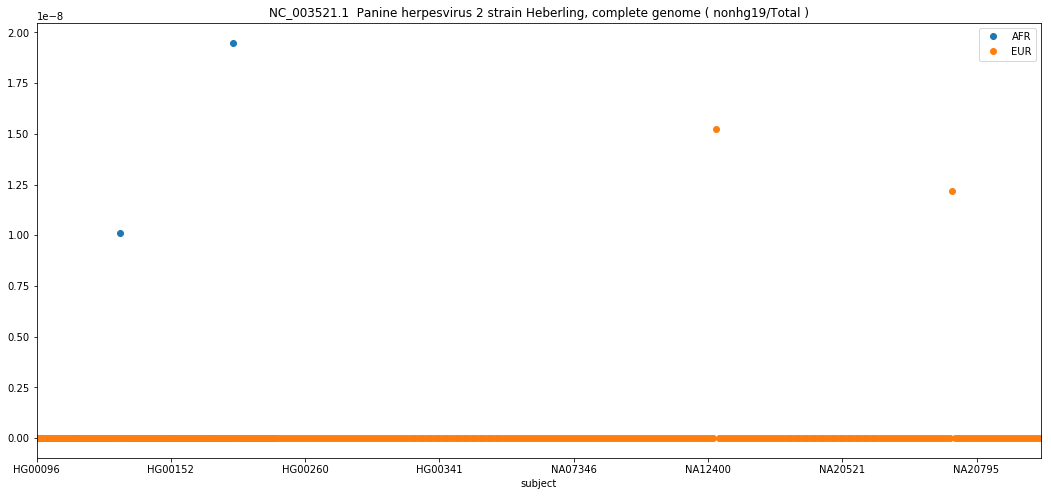

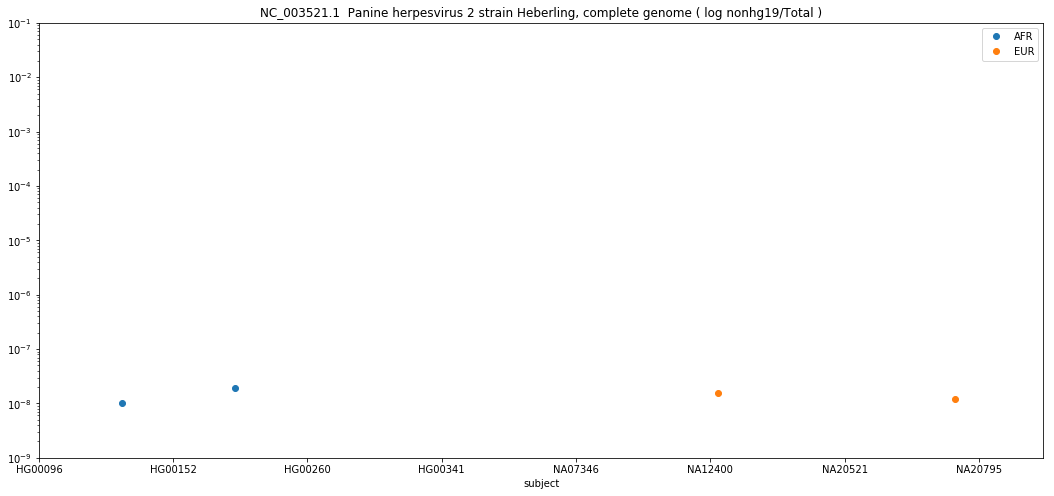

NC_006273.2  Human herpesvirus 5 strain Merlin, complete genome


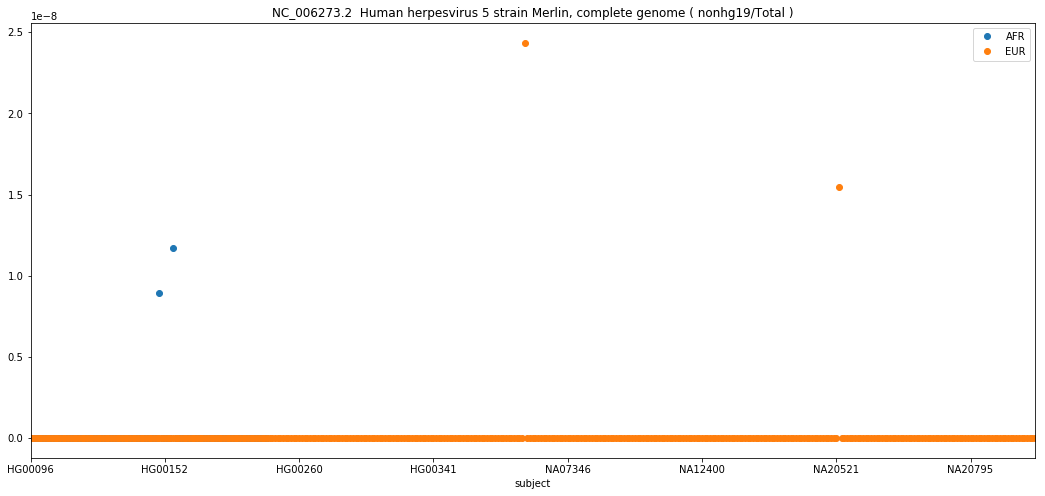

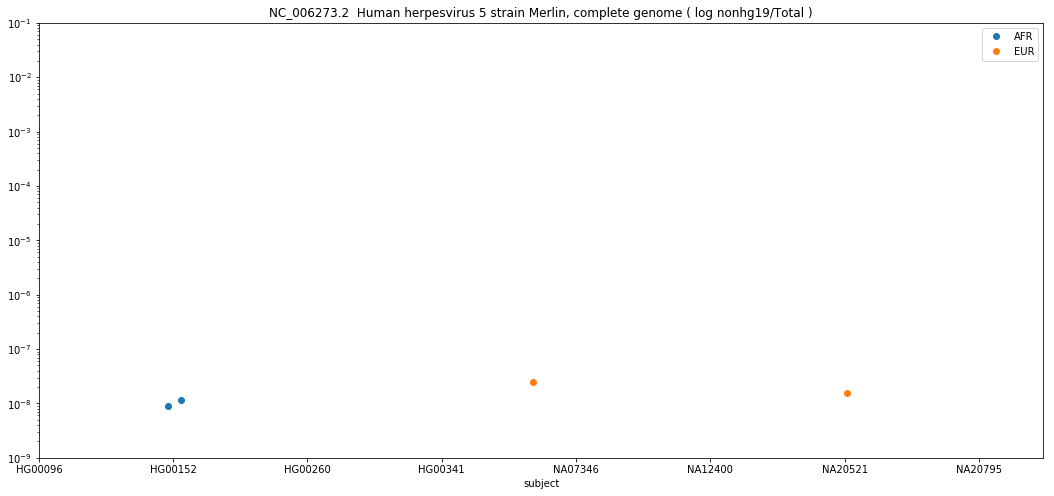

NC_007605.1  Human gammaherpesvirus 4, complete genome


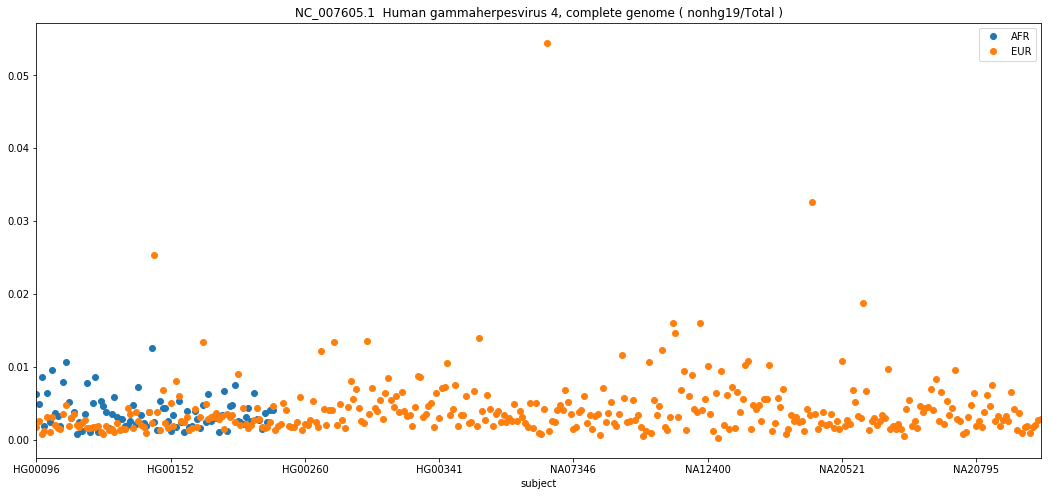

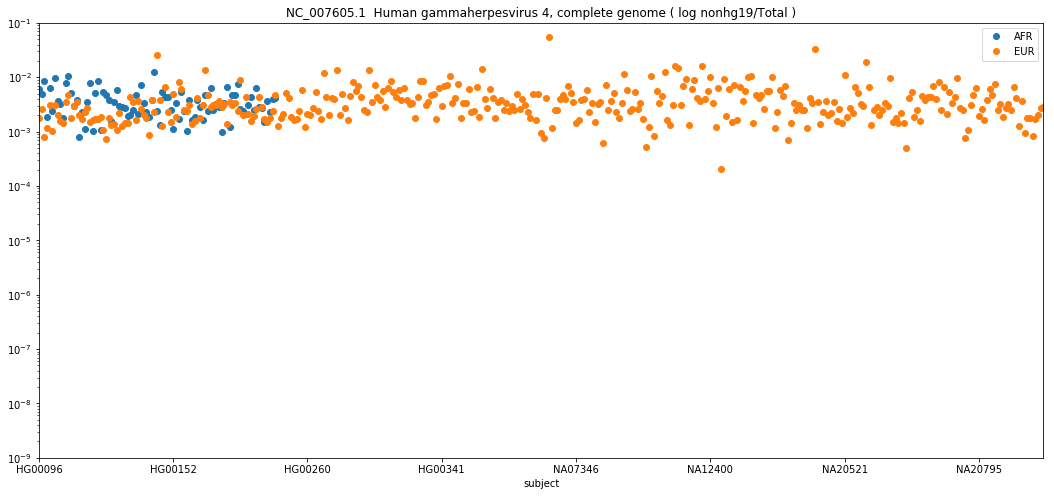

NC_008168.1  Choristoneura fumiferana granulovirus, complete genome


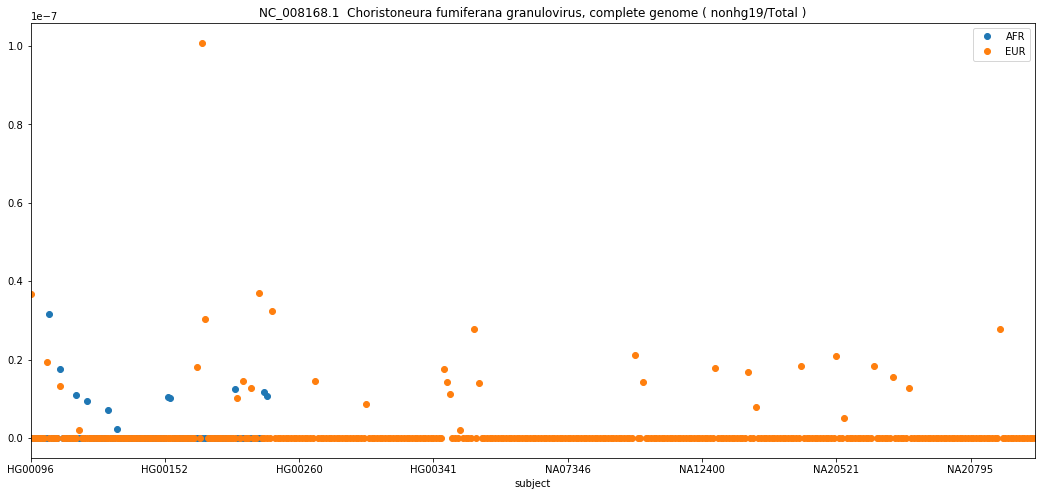

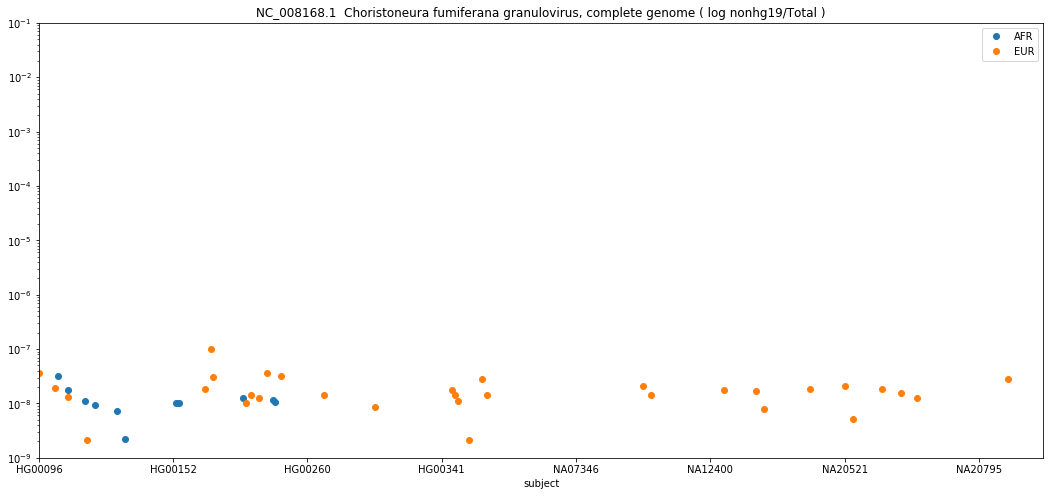

NC_009333.1  Human herpesvirus 8, complete genome


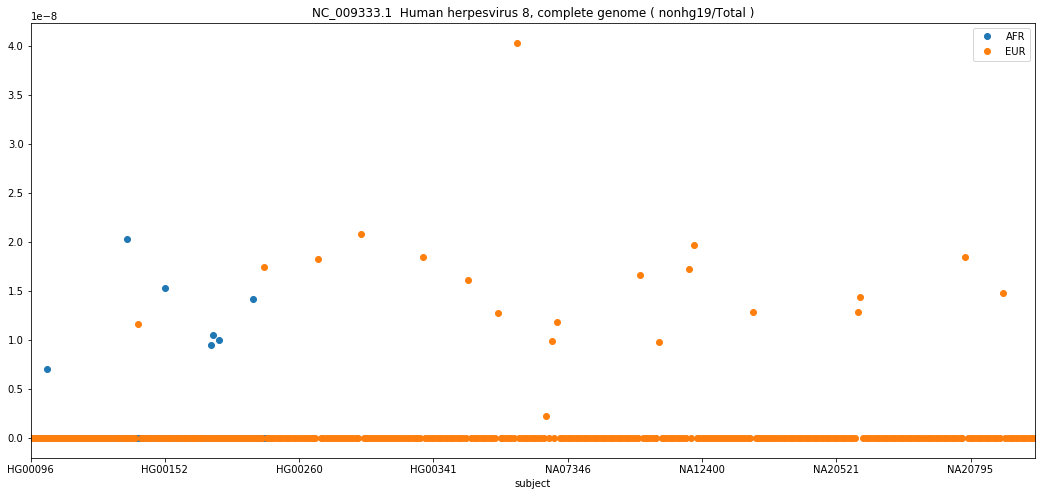

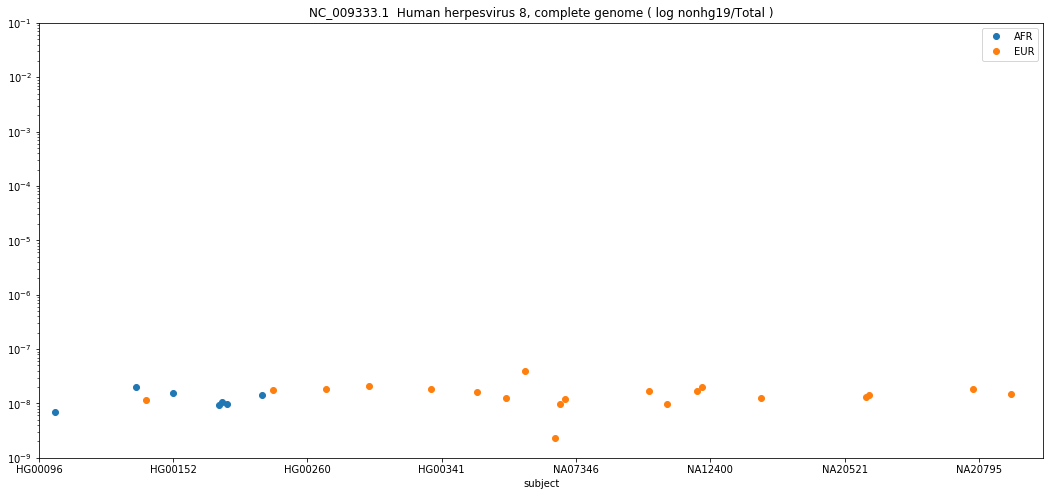

NC_016447.1  Aotine herpesvirus 1 strain S34E, complete genome


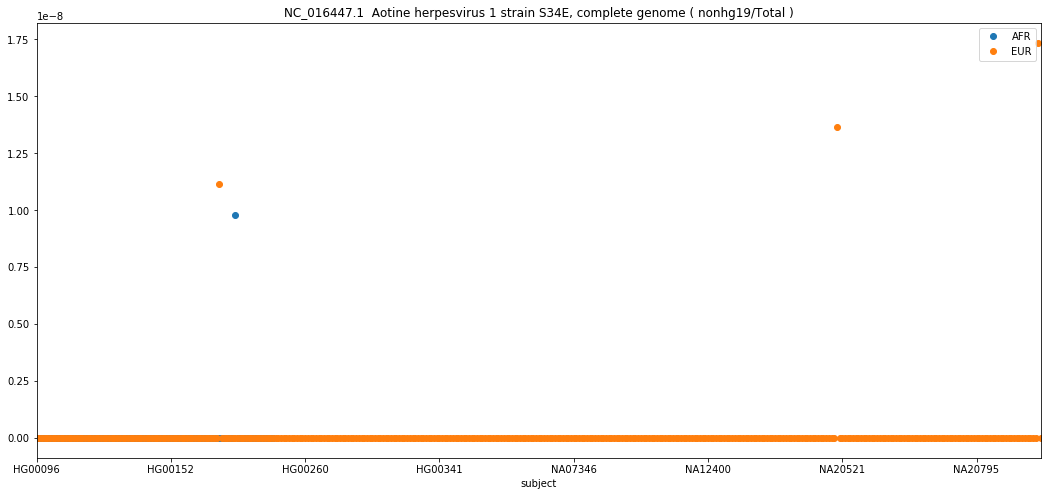

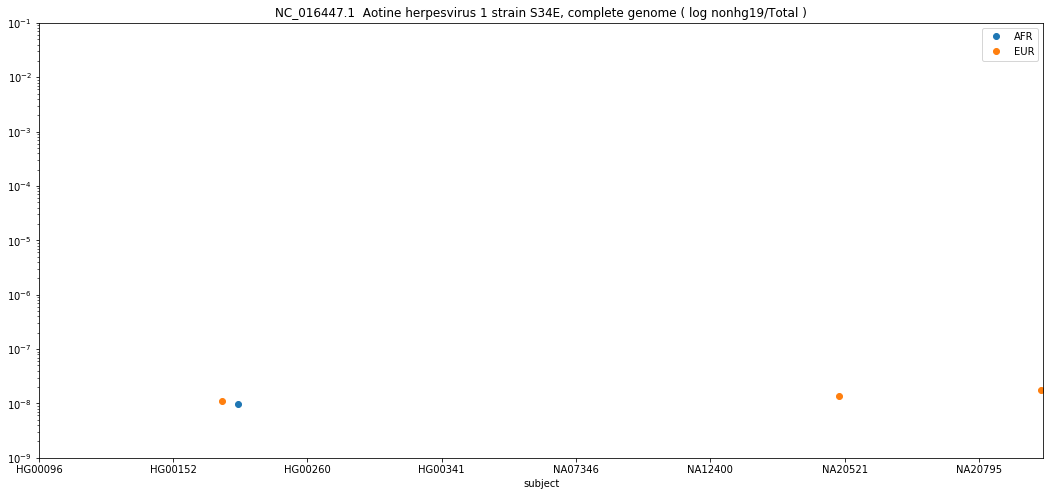

NC_016448.1  Saimiriine herpesvirus 4 strain SqSHV, complete genome


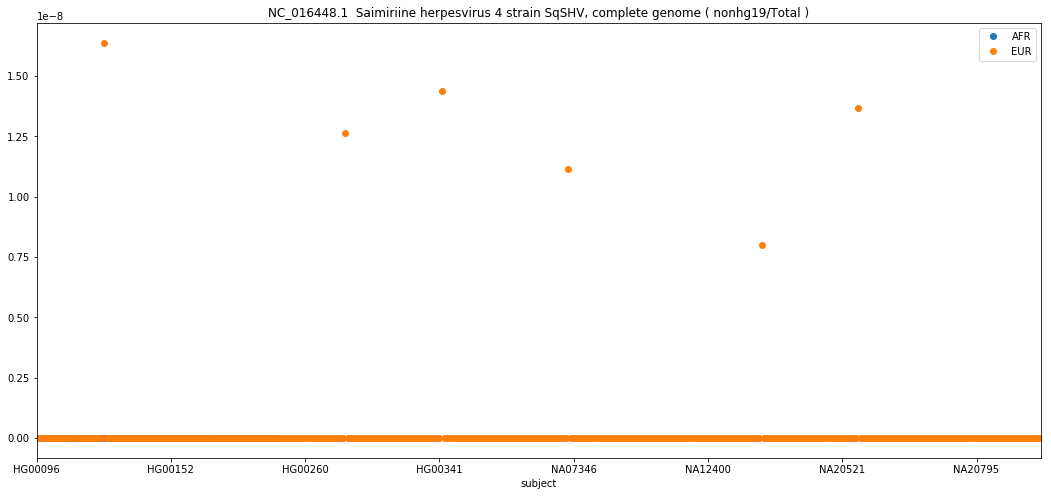

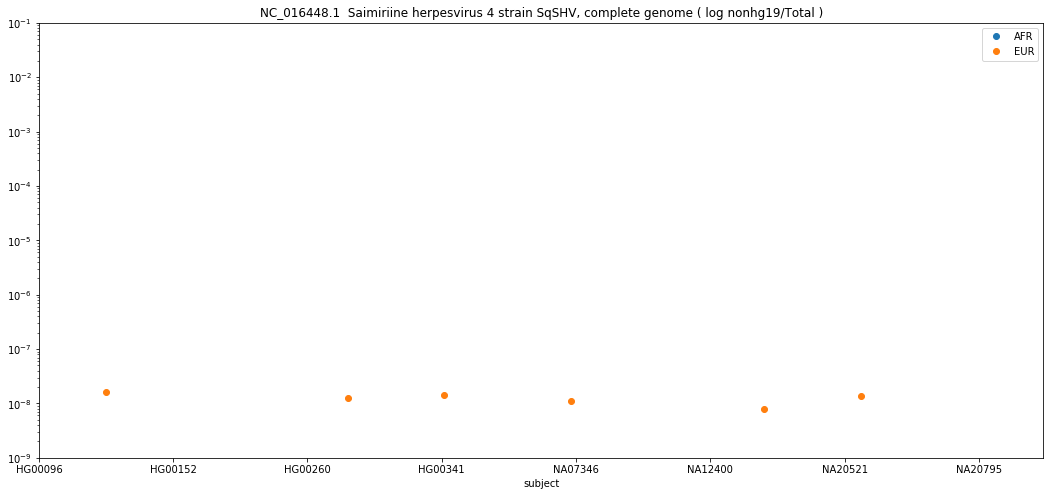

U43400.1  Human herpesvirus-7 (HHV7) JI, complete virion genome


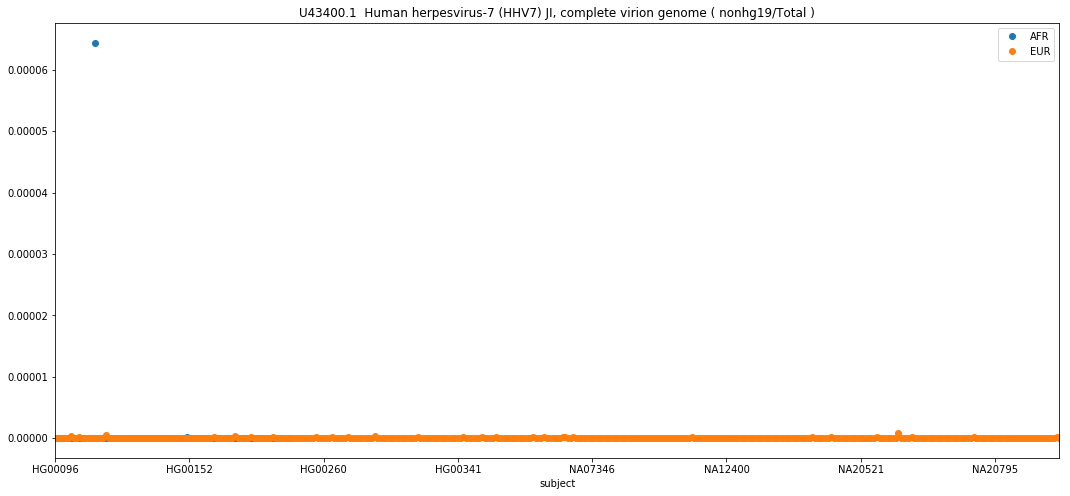

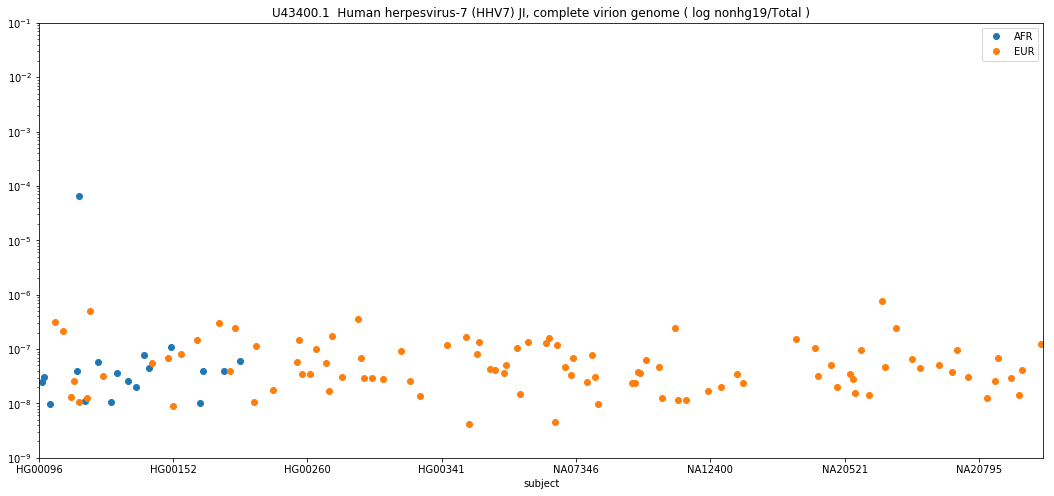

X14112.1  Human herpesvirus 1 complete genome


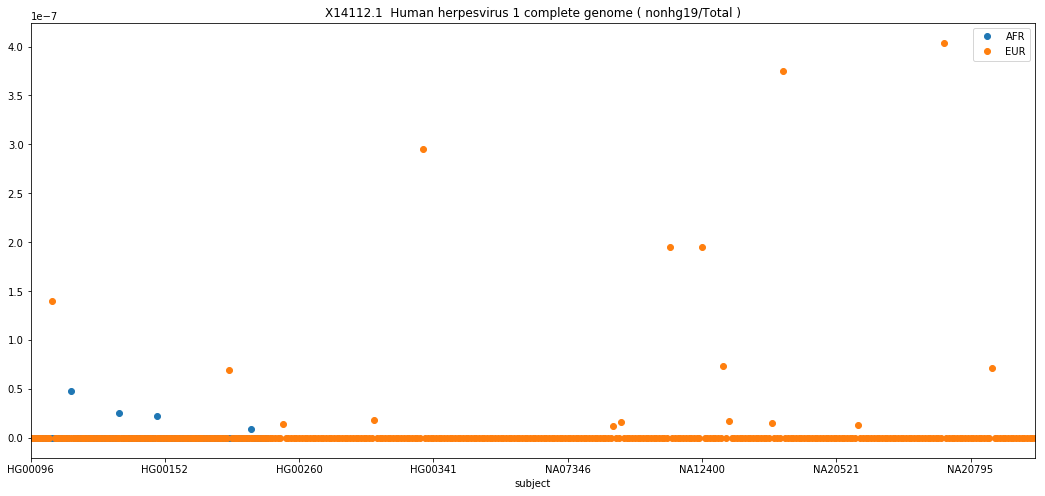

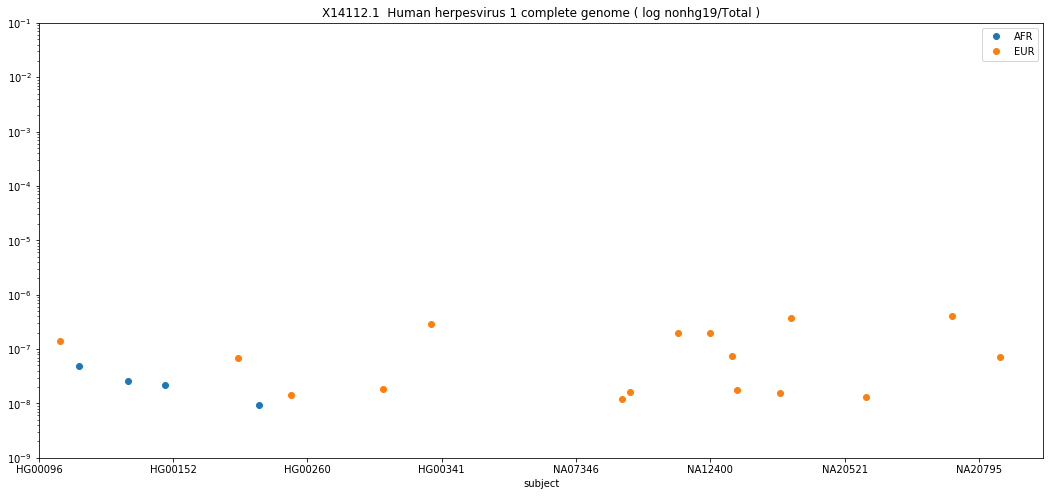

X17403.1  Human cytomegalovirus strain AD169 complete genome


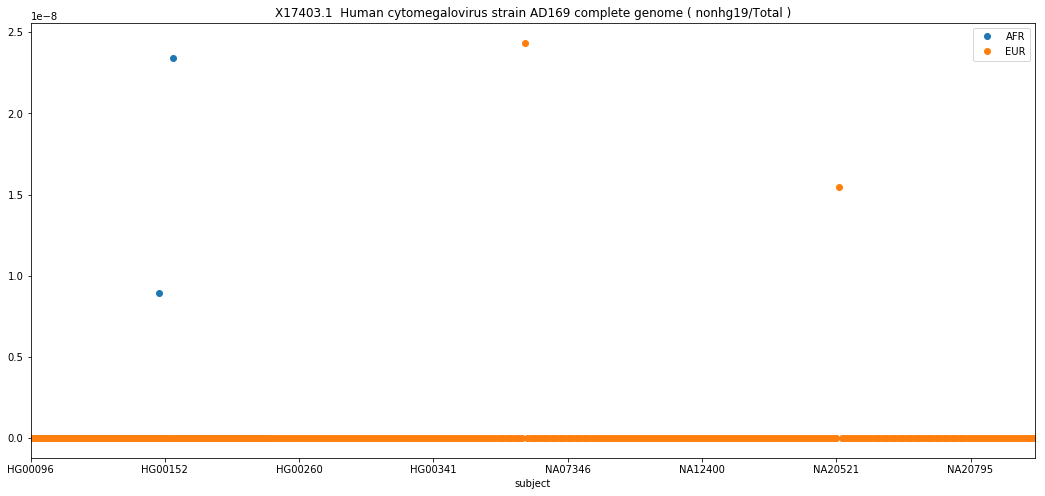

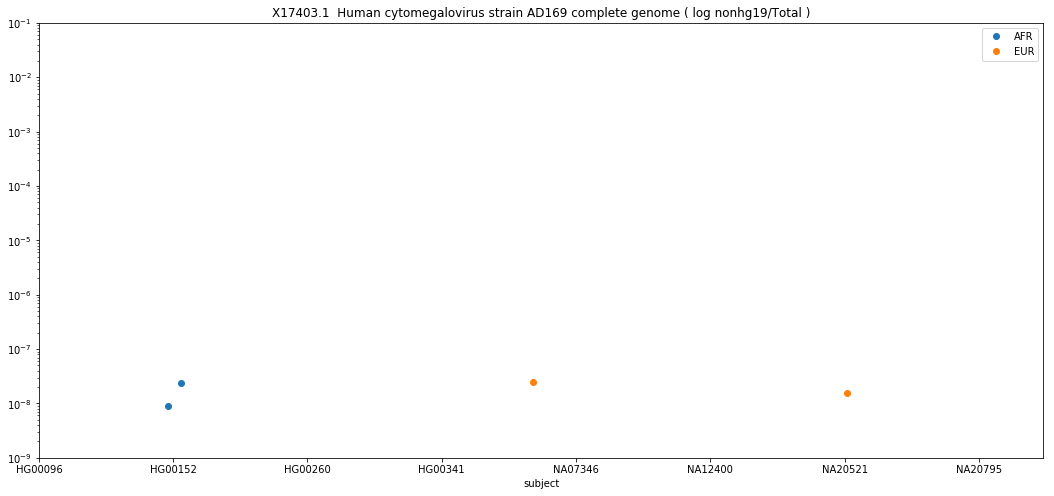

X83413.2  Human betaherpesvirus 6A, variant A DNA, complete virion genome, isolate U1102


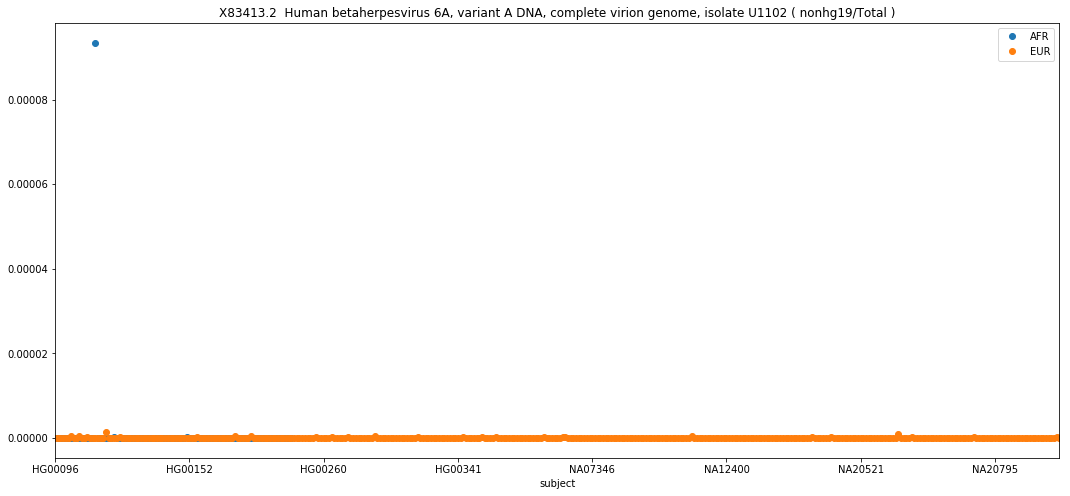

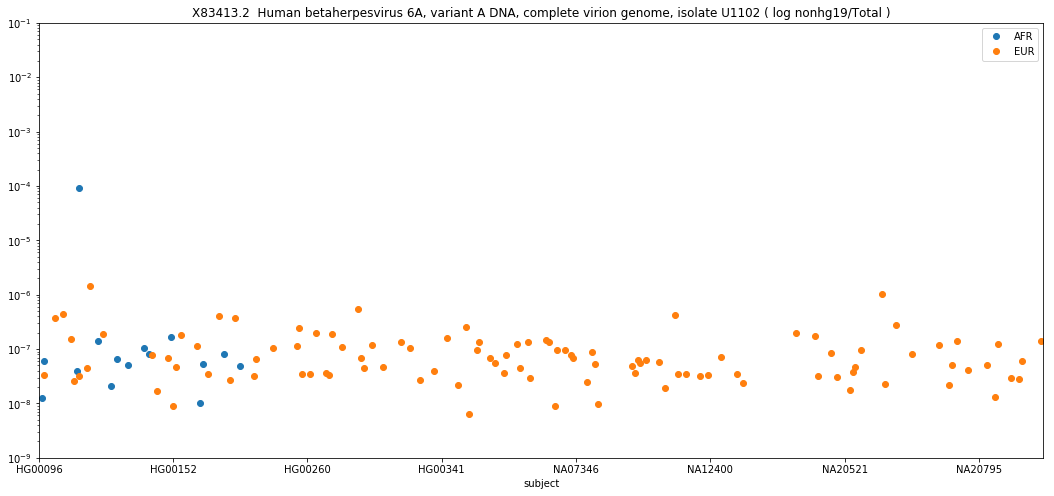

Z86099.2  Herpes simplex virus type 2 (strain HG52), complete genome


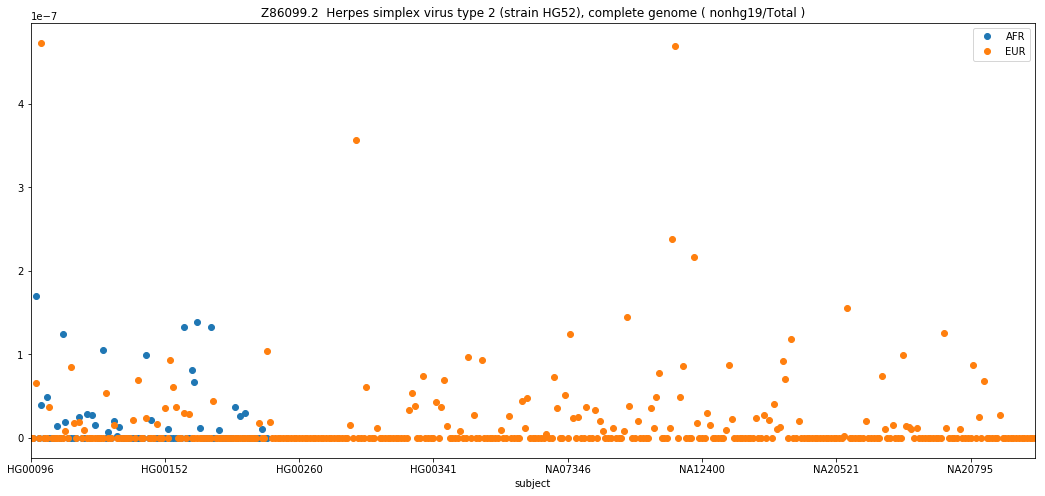

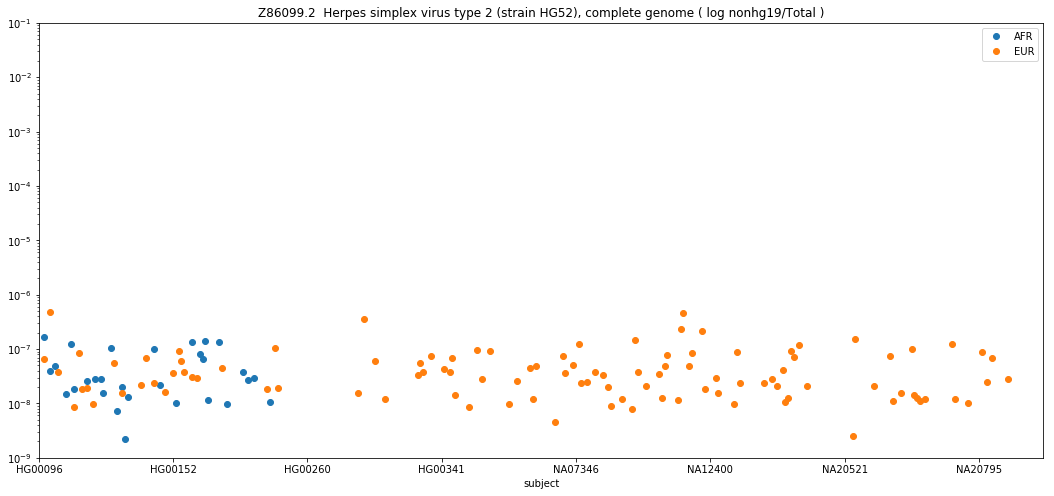

In [11]:
for accession, row in virii.iterrows():
    tmp=accession.replace(".", "_")
    #print('nonhg19_'+tmp+'_total')
    if( df['nonhg19_'+tmp+'_total'].max() > 0 ):  
        title=accession + "  " + row['description']
        print(title)
        #df.plot( title=title[:110],marker='o',linewidth=0,
        #            logy=False,x='subject',y='nonhg19_'+tmp+'_unmapped')
        #
        #fig, ax = plt.subplots()
        #for name, group in df.groupby('Super Population Code'):
        #    group.plot(title=title[:110] + " ( nonhg19/Unmapped )",
        #        x='subject', y='nonhg19_'+tmp+'_unmapped', ax=ax, label=name, marker='o',linewidth=0)
        #plt.legend()
        #
        #fig, ax = plt.subplots()
        #for name, group in df.groupby('Super Population Code'):
        #    group.plot(title=title[:110] + " ( log nonhg19/Unmapped )", logy=True, ylim=[1e-9,0.1],
        #        x='subject', y='nonhg19_'+tmp+'_unmapped', ax=ax, label=name, marker='o',linewidth=0)
        #plt.legend()
        #fig, ax = plt.subplots()
        #for name, group in df.groupby('Gender'):
        #    group.plot(x='subject', y='nonhg19_'+tmp+'_unmapped', ax=ax, label=name, marker='o',linewidth=0)
        #plt.legend()
        #
        #df.plot( title=title[:110],marker='o',linewidth=0,
        #            logy=False,x='subject',y='nonhg19_'+tmp+'_total')

        fig, ax = plt.subplots()
        for name, group in df.groupby('Super Population Code'):
            group.plot(title=title[:110] + " ( nonhg19/Total )",
                x='subject', y='nonhg19_'+tmp+'_total', ax=ax, label=name, marker='o',linewidth=0)
        plt.legend()
        
        fig, ax = plt.subplots()
        for name, group in df.groupby('Super Population Code'):
            group.plot(title=title[:110] + " ( log nonhg19/Total )", logy=True, ylim=[1e-9,0.1],
                x='subject', y='nonhg19_'+tmp+'_total', ax=ax, label=name, marker='o',linewidth=0)
        plt.legend()
        #fig, ax = plt.subplots()
        #for name, group in df.groupby('Gender'):
        #    group.plot(x='subject', y='nonhg19_'+tmp+'_total', ax=ax, label=name, marker='o',linewidth=0)
        #plt.legend()

        plt.show()


In [12]:
for accession, row in virii.iterrows():
    tmp=accession.replace(".", "_")
    if( df['nonhg19_'+tmp+'_total'].max() > 0 ):
        mean=df['nonhg19_'+tmp+'_total'].mean()
        std=df['nonhg19_'+tmp+'_total'].std()
        print(accession + "  " + row['description'] + "\nmean " + str(mean) + "\tstddev " + str(std))
        s=df[ df['nonhg19_'+tmp+'_total'] > ( mean + std )]
        print(">mean+stddev : " + str(len(s)))
        print(", ".join(s['subject'].tolist()))
        s=df[ df['nonhg19_'+tmp+'_total'] > ( mean + 2*std )]
        print(">mean+2*stddev : " + str(len(s)))
        print(", ".join(s['subject'].tolist()))
        print()
        print()

AB513134.1  Human T-lymphotropic virus 1 proviral DNA, complete genome, isolate: B1033-2009
mean 4.705211030702208e-11	stddev 1.013533474107144e-09
>mean+stddev : 1
NA19147
>mean+2*stddev : 1
NA19147


AB618031.1  Herpes simplex virus (type 1 /strain RH2) DNA, nearly complete genome
mean 2.7312031872523405e-07	stddev 6.322271445031537e-07
>mean+stddev : 31
HG00104, HG00158, HG00263, HG00266, HG00274, HG00345, HG00351, NA07347, NA11829, NA11831, NA11930, NA12144, NA12342, NA12489, NA12546, NA12775, NA12778, NA12890, NA18498, NA18858, NA18867, NA18908, NA18934, NA19108, NA19129, NA19153, NA19160, NA19213, NA20769, NA20787, NA20809
>mean+2*stddev : 26
HG00104, HG00158, HG00266, HG00345, NA07347, NA11829, NA11831, NA11930, NA12144, NA12342, NA12489, NA12546, NA12775, NA12778, NA12890, NA18498, NA18858, NA18867, NA18908, NA18934, NA19108, NA19129, NA19153, NA19160, NA19213, NA20809


AF037218.1  Human herpesvirus 7 strain RK, complete genome
mean 1.193040103835234e-06	stddev 2.2729129965725

In [13]:
group = df.groupby('Super Population Code')

In [14]:
group.groups

{'AFR': Int64Index([282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294,
             295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307,
             308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320,
             321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333,
             334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346,
             347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359,
             360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370],
            dtype='int64'),
 'EUR': Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             454, 455, 456, 457, 458, 459, 460, 461, 462, 463],
            dtype='int64', length=375)}

In [15]:
import datetime
print(str(datetime.datetime.now()))

2019-02-02 21:18:23.770640
